In [1]:
import os
os.chdir("../")
with open('run/settings.py', 'r') as file:
    exec(file.read())

Random seed set to 333
using device:  cpu


# Configuration (customizable)

In [2]:
overwrite = False
model_name = 'syn4_gt' 

text1 = ('No trend.',1)
text2 = ('No seasonal pattern.',1)
text3 = ('No sharp shifts.',1)
text4 = ("The time series exhibits low variability.", 1)
counter_text11 = ('The time series shows upward linear trend.',1)
counter_text12 = ('The time series shows downward linear trend.',1)
counter_text13 = ('The time series shows upward quadratic trend.',1)
counter_text14 = ('The time series shows downward quadratic trend.',1)
counter_text2 = ('The time series exhibits a seasonal pattern.',1)
counter_text31 = ('The mean of the time series shifts upwards.',1)
counter_text32 = ('The mean of the time series shifts downwards.',1)
counter_text4 = ("The time series exhibits high variability.",1)


text_config = {'text_pairs': [
                    [text1, counter_text11, counter_text12, counter_text13, counter_text14],
                    [text2, counter_text2],
                    [text3, counter_text31, counter_text32],
                    [text4, counter_text4]
                ],  'n': None, 'gt': True}

attr_id = 3 # y_col by the third attribute (third element in the text_config['text_pairs'])
update_config(
    
    # Eval settings (clip)
    # ts2txt
    y_col = 'segment'+str(attr_id),
    y_levels = [t[0]for t in text_config['text_pairs'][attr_id-1]],
    y_pred_levels =[t[0]for t in text_config['text_pairs'][attr_id-1]],
    # txt2ts
    txt2ts_y_cols = ['segment1', 'segment2', 'segment3', 'segment4'], # 
    
    
    # Data settings
    text_col = 'text', #'ts_description',
    seq_length = 200,
    custom_target_cols = ['segment1', 'segment2', 'segment3', 'segment4', 'label'], # 'label' is the same as the default "by_label" target 
    
    
    # Model settings
    model_name = model_name,
    variational = False,
    
    # Train settings
    init_lr = 1e-4,
    num_saves = 1,
    
    # Text configuration
    text_config = text_config
)
config_dict = get_config_dict()



# Data

In [3]:
# change data preparation for a given experiment
with open('run/prepare_datasets/synthetic.py', 'r') as file:
    exec(file.read())
# prepare model inputs
with open('run/inputs.py', 'r') as file:
    exec(file.read())

{'No trend.': (210, 60, 30), 'The time series shows upward linear trend.': (210, 60, 30), 'The time series shows downward linear trend.': (210, 60, 30), 'The time series shows upward quadratic trend.': (210, 60, 30), 'The time series shows downward quadratic trend.': (210, 60, 30), 'No seasonal pattern.': (210, 60, 30), 'The time series exhibits a seasonal pattern.': (210, 60, 30), 'No sharp shifts.': (210, 60, 30), 'The mean of the time series shifts upwards.': (210, 60, 30), 'The mean of the time series shifts downwards.': (210, 60, 30), 'The time series exhibits low variability.': (210, 60, 30), 'The time series exhibits high variability.': (210, 60, 30)}


final distribution of text prediction
text
No trend. No seasonal pattern. No sharp shifts. The time series exhibits low variability.                                                                                                210
No trend. No seasonal pattern. No sharp shifts. The time series exhibits high variability.         

# Model (customizable)

In [4]:
# overwrite = False
with open('run/model.py', 'r') as file:
    exec(file.read())


Layer (type:depth-idx)                                                      Param #
VITAL                                                                       --
├─TSVAEEncoder: 1-1                                                         --
│    └─LocalNorm: 2-1                                                       --
│    └─MultiCNNEncoder: 2-2                                                 768
│    │    └─ModuleList: 3-1                                                 4,923,424
│    │    └─MultiheadAttention: 3-2                                         2,362,368
│    │    └─LayerNorm: 3-3                                                  1,536
│    └─Linear: 2-3                                                          590,592
│    └─Linear: 2-4                                                          590,592
├─TextEncoder: 1-2                                                          --
│    └─TextEncoderMultiCNN: 2-5                                             768
│    │    └─Module

# Train

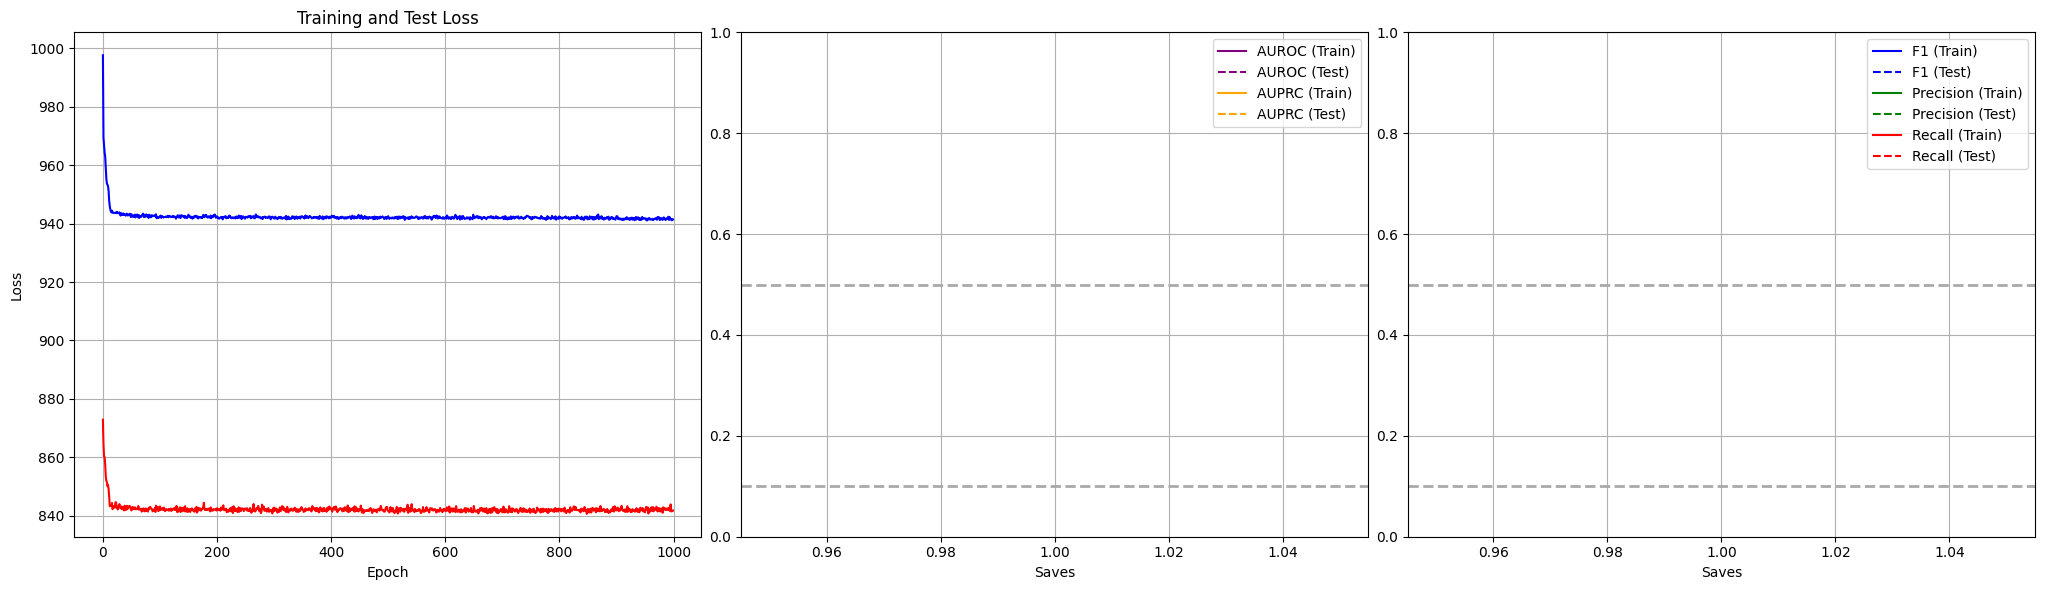

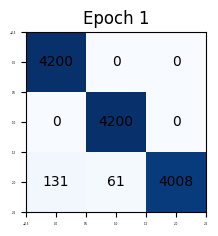

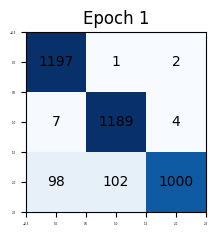

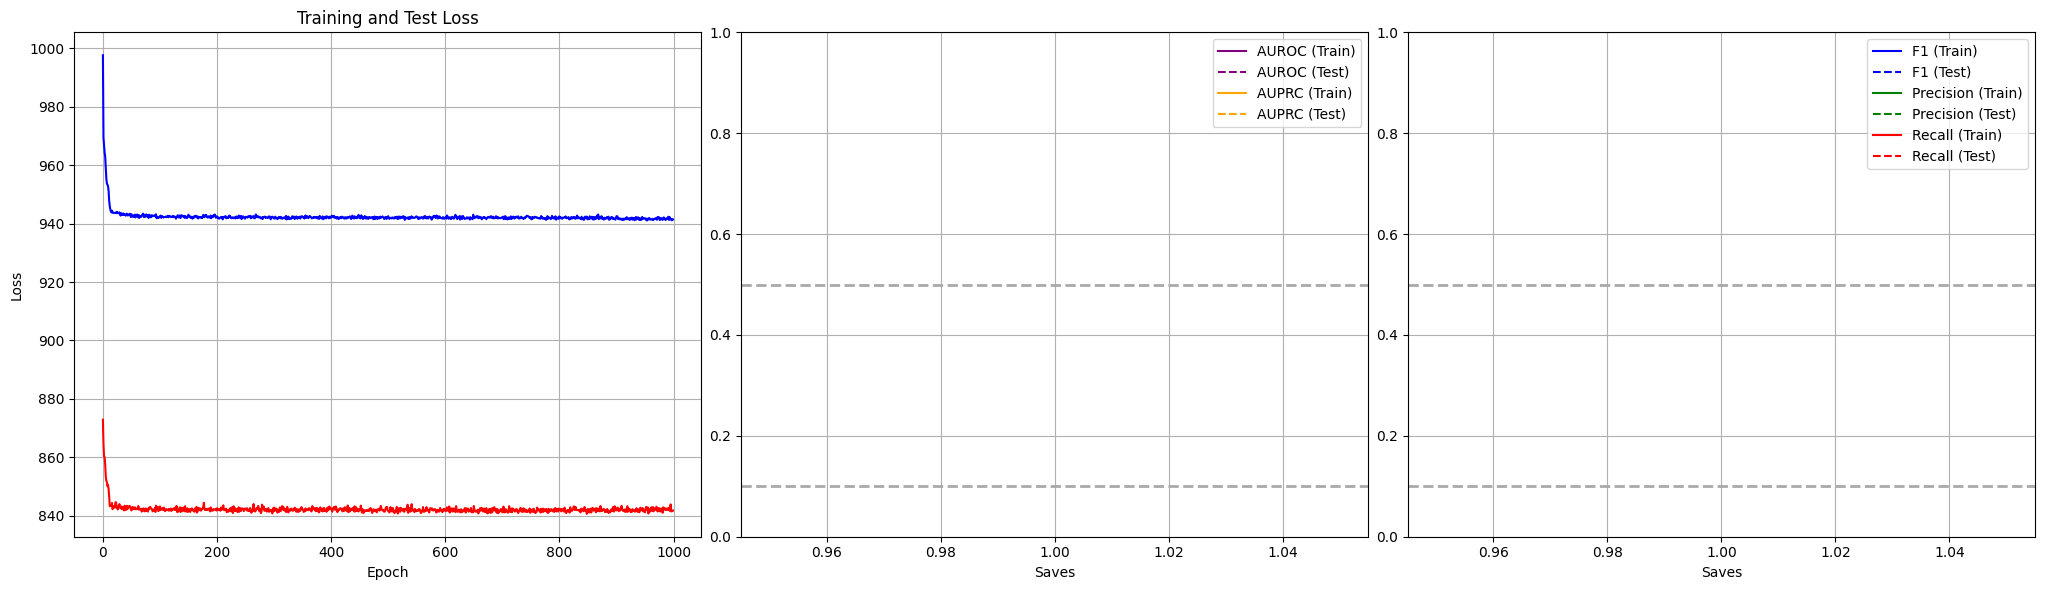

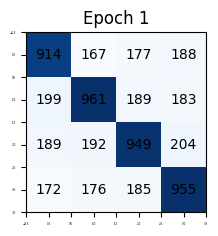

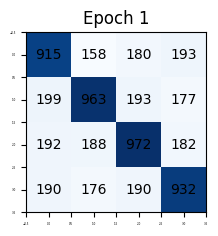

KeyboardInterrupt: 

In [5]:
# overwrite = False
with open('run/train.py', 'r') as file:
    exec(file.read())


# Generation

In [ ]:
tid=0
# viz_generation_marginal(df_train, model, config_dict, tid=tid)
viz_generation_conditional(df_train, model, config_dict, tid=tid, sampling=True, b=100, ep=200)

# Evaluation

In [103]:
with open('run/eval.py', 'r') as file:
    exec(file.read())


## Point-wise performance vs GT

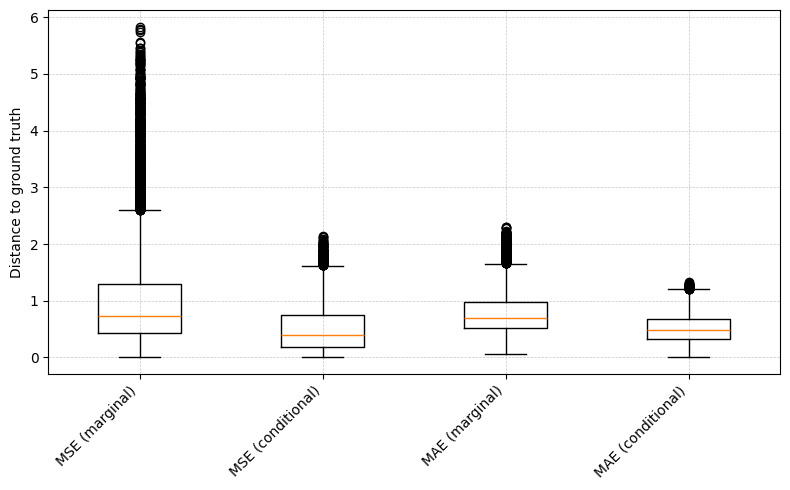

In [104]:
import matplotlib.pyplot as plt

# prepare data and labels
metrics = ['mse', 'mae']
types_ = ['marginal', 'conditional']
data = [
    df_pw_dists_all[(df_pw_dists_all.metric == m) & 
                    (df_pw_dists_all.aug_type == t)].score
    for m in metrics for t in types_
]
labels = [f"{m.upper()} ({t})" for m in metrics for t in types_]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot(data, labels=labels)
ax.set_ylabel('Distance to ground truth')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


## Math properties (applicable to quantitative time series attributes)

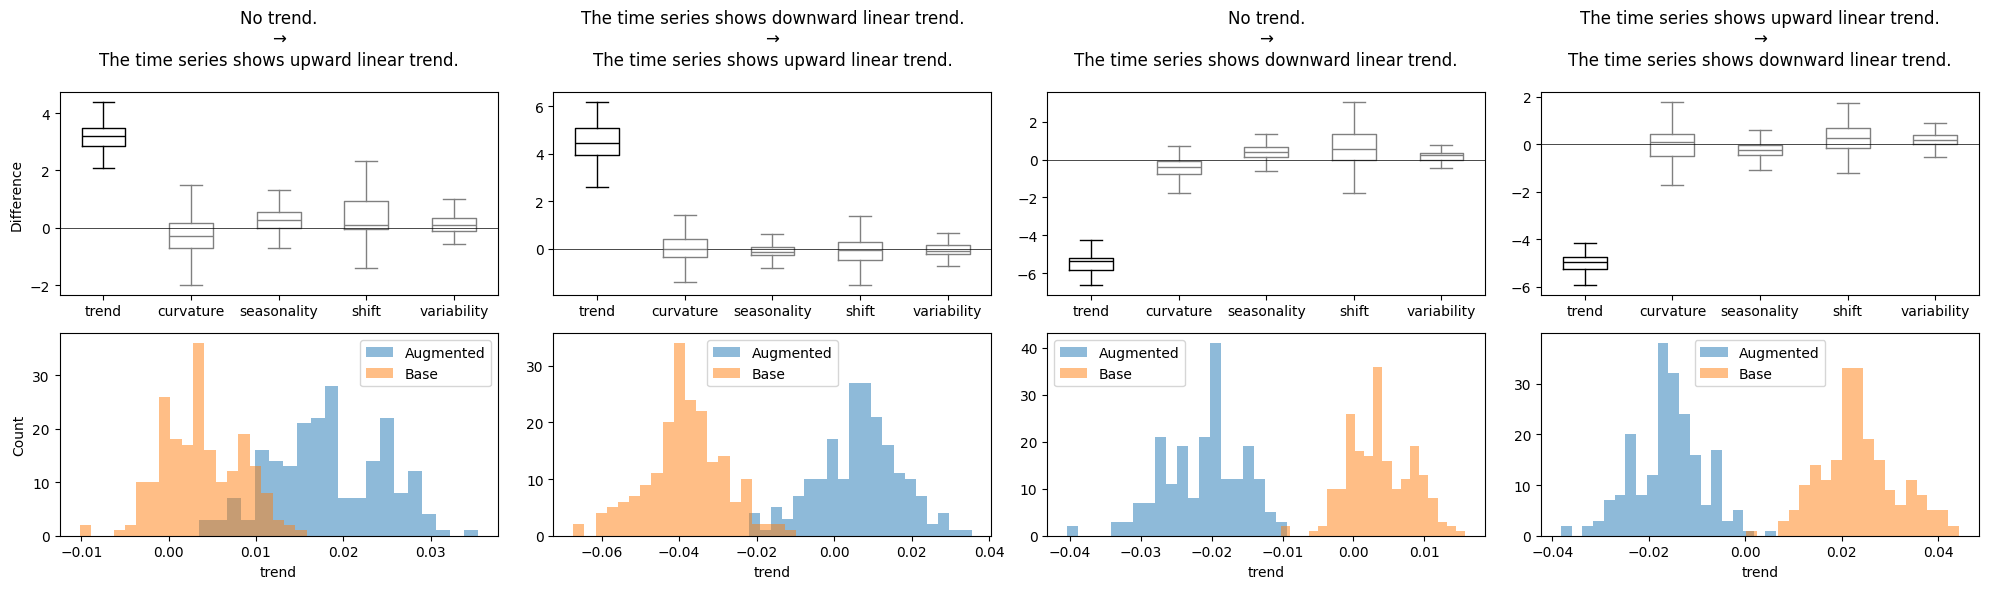

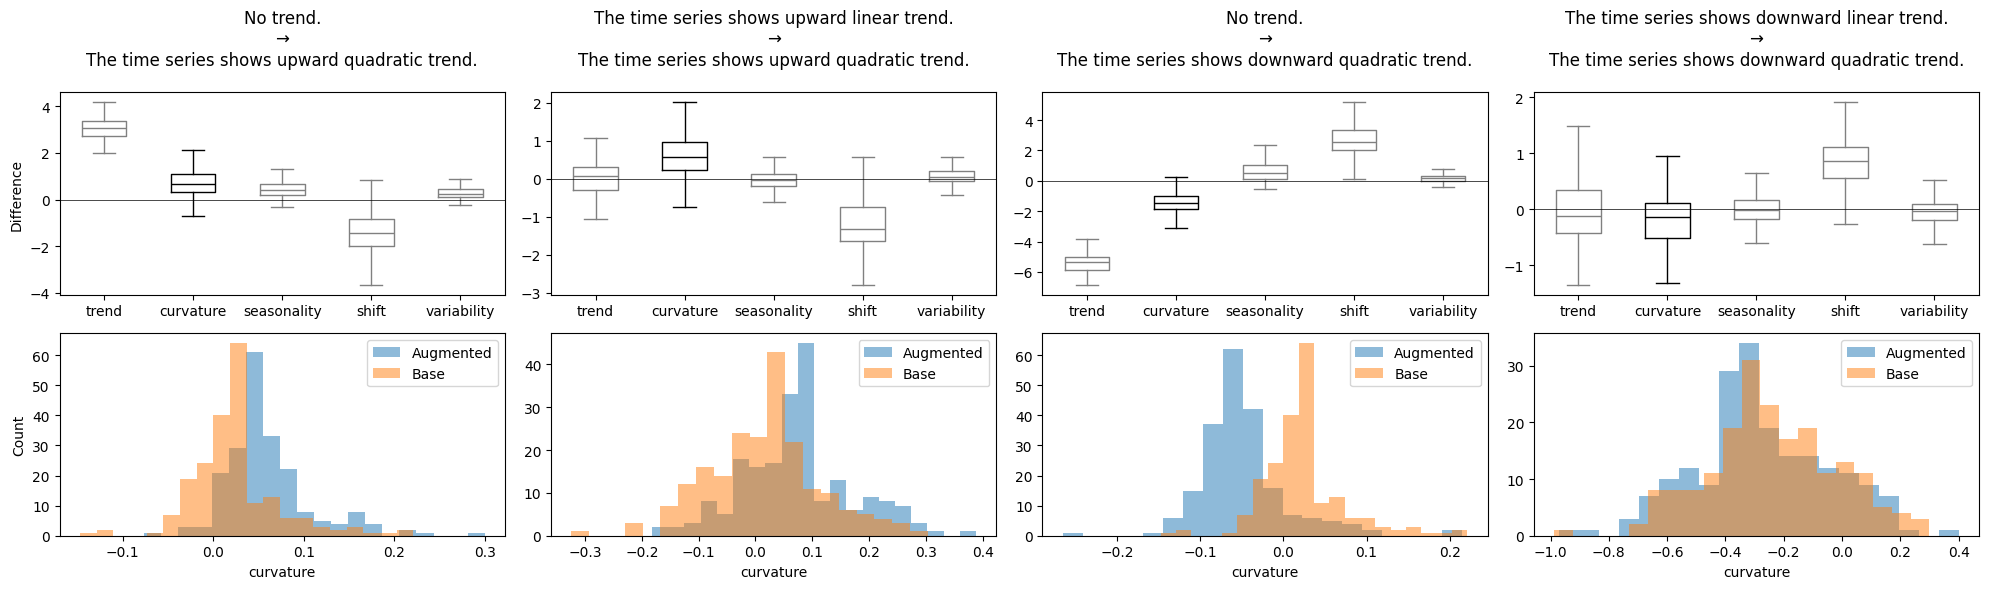

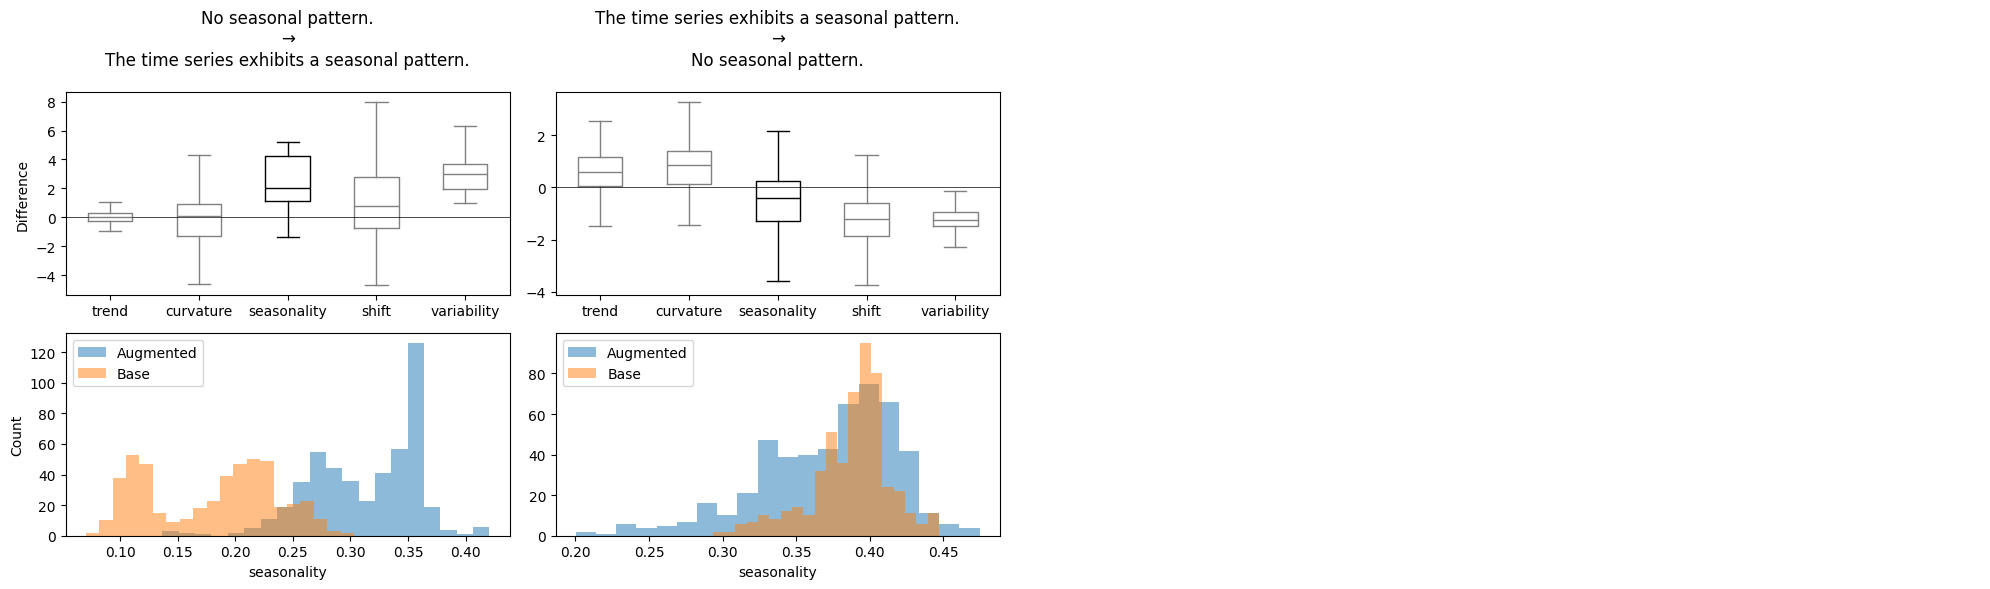

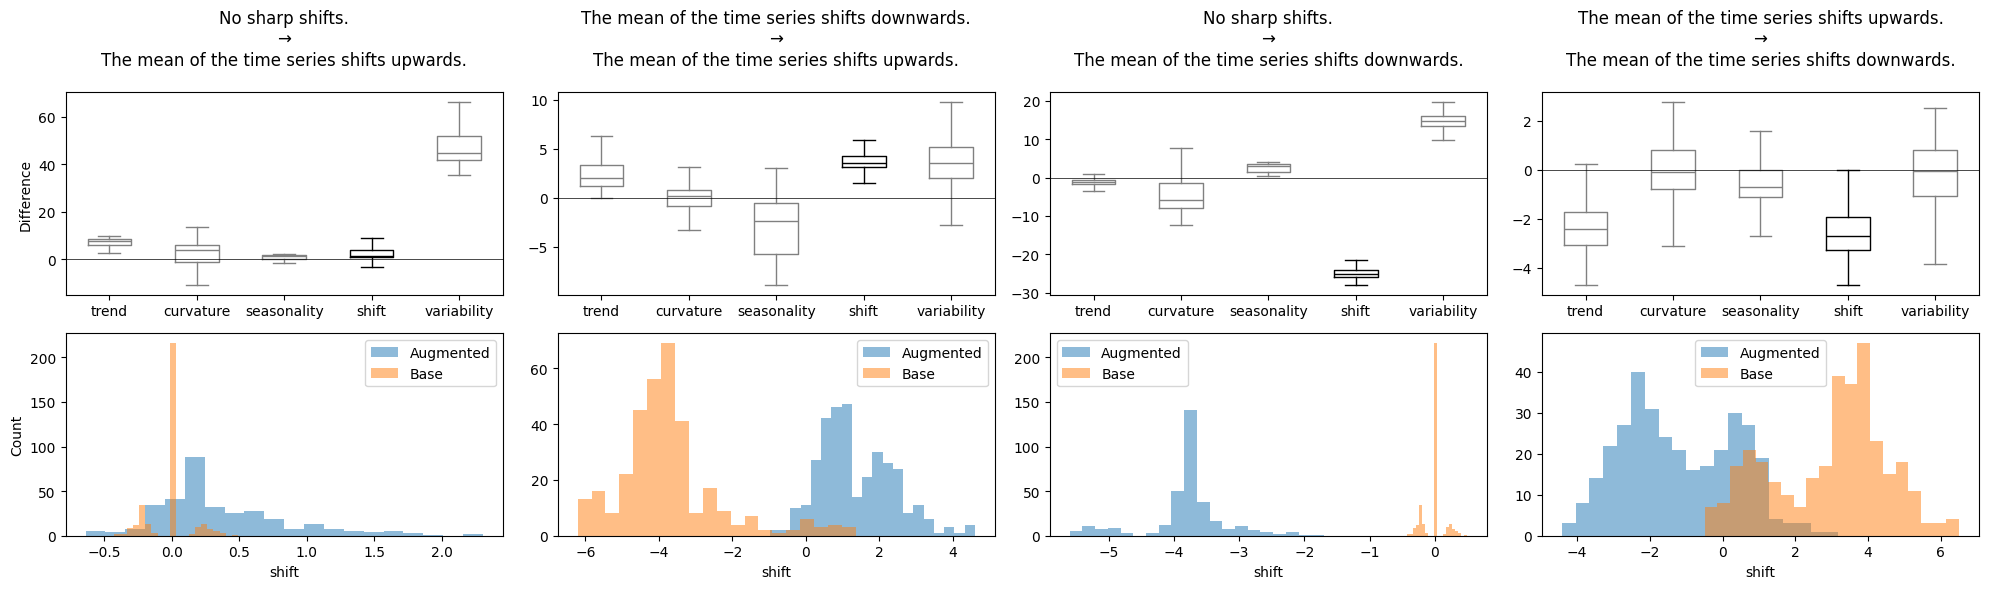

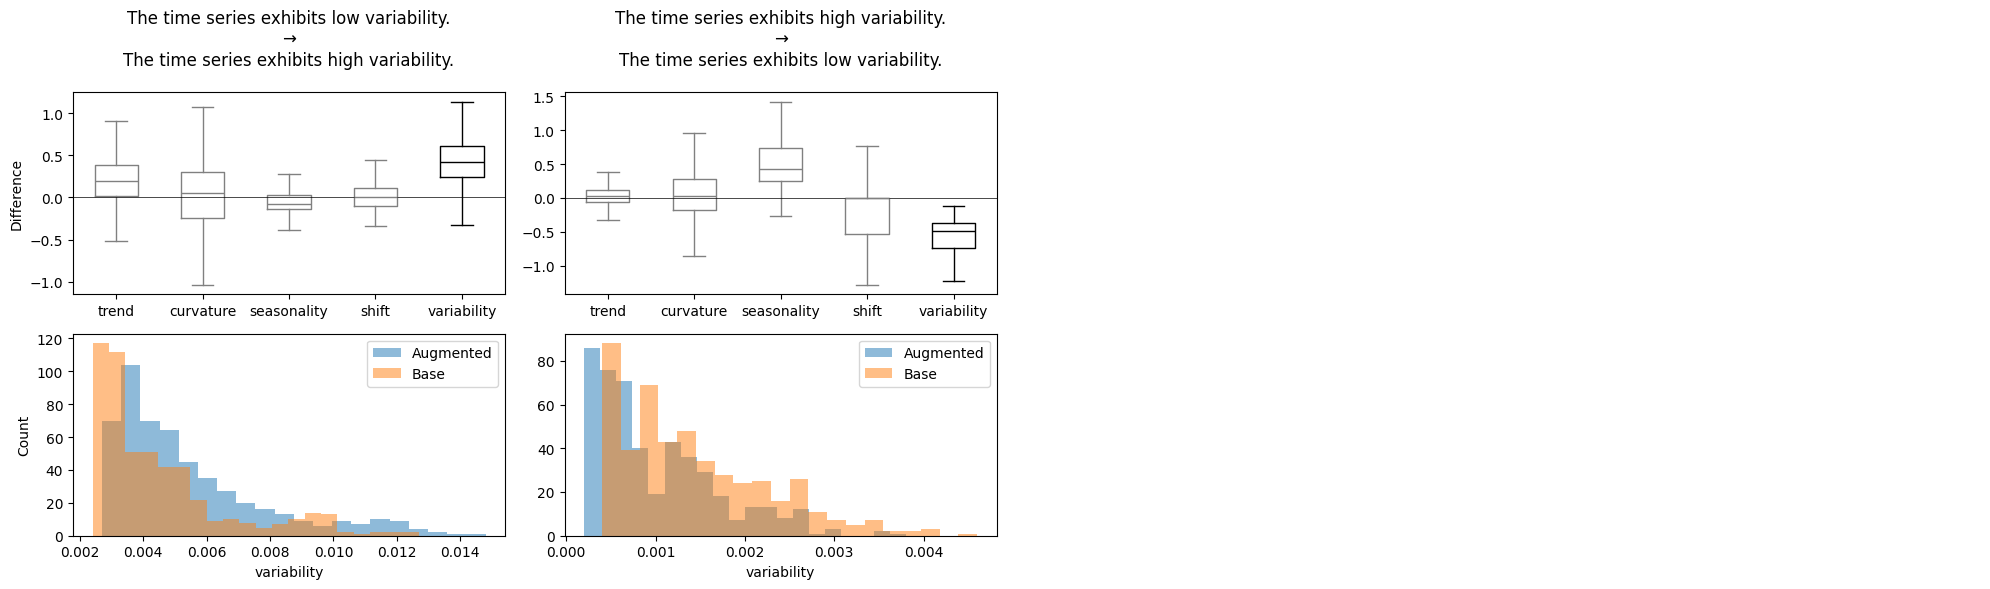

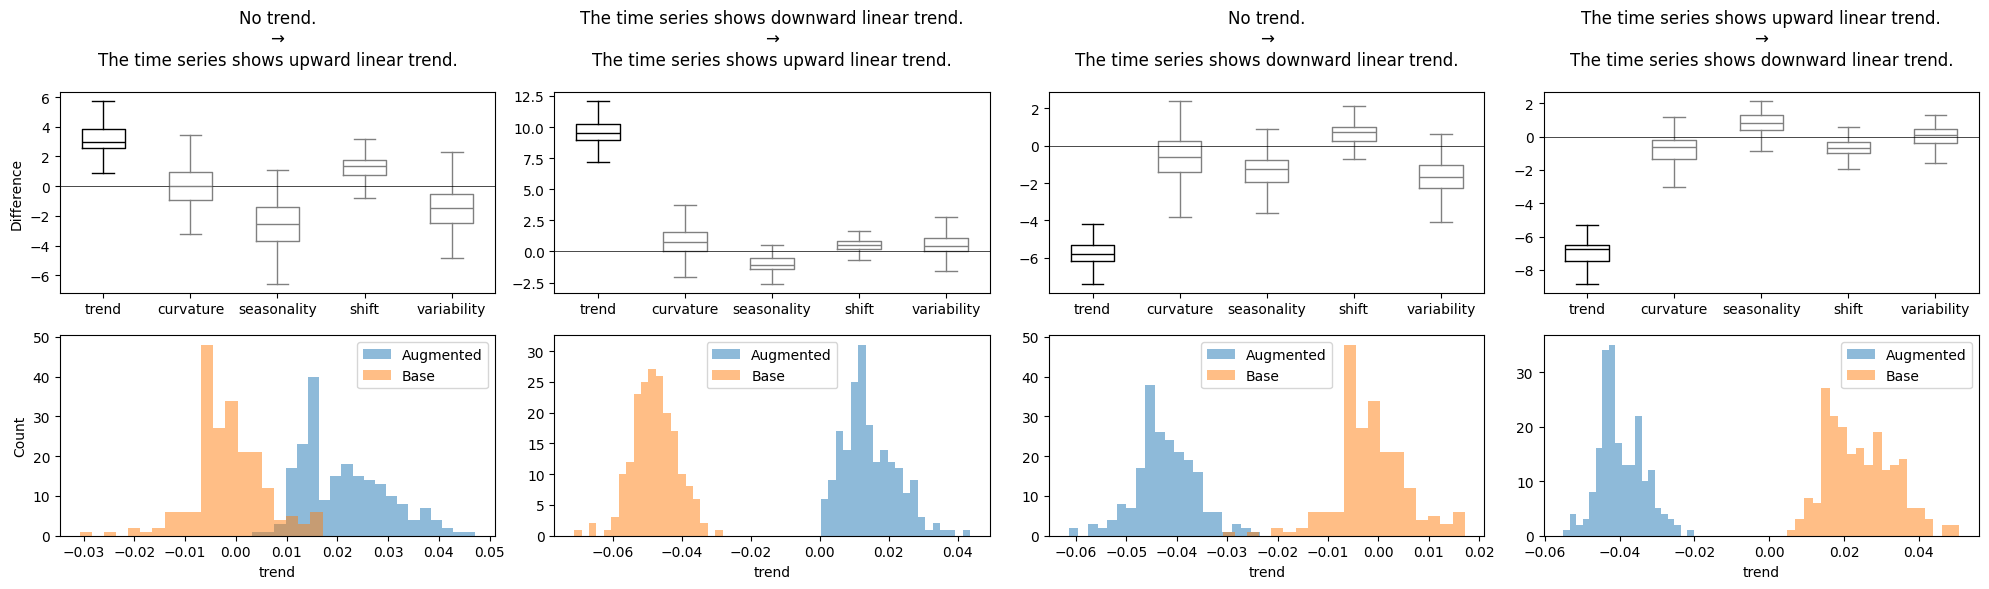

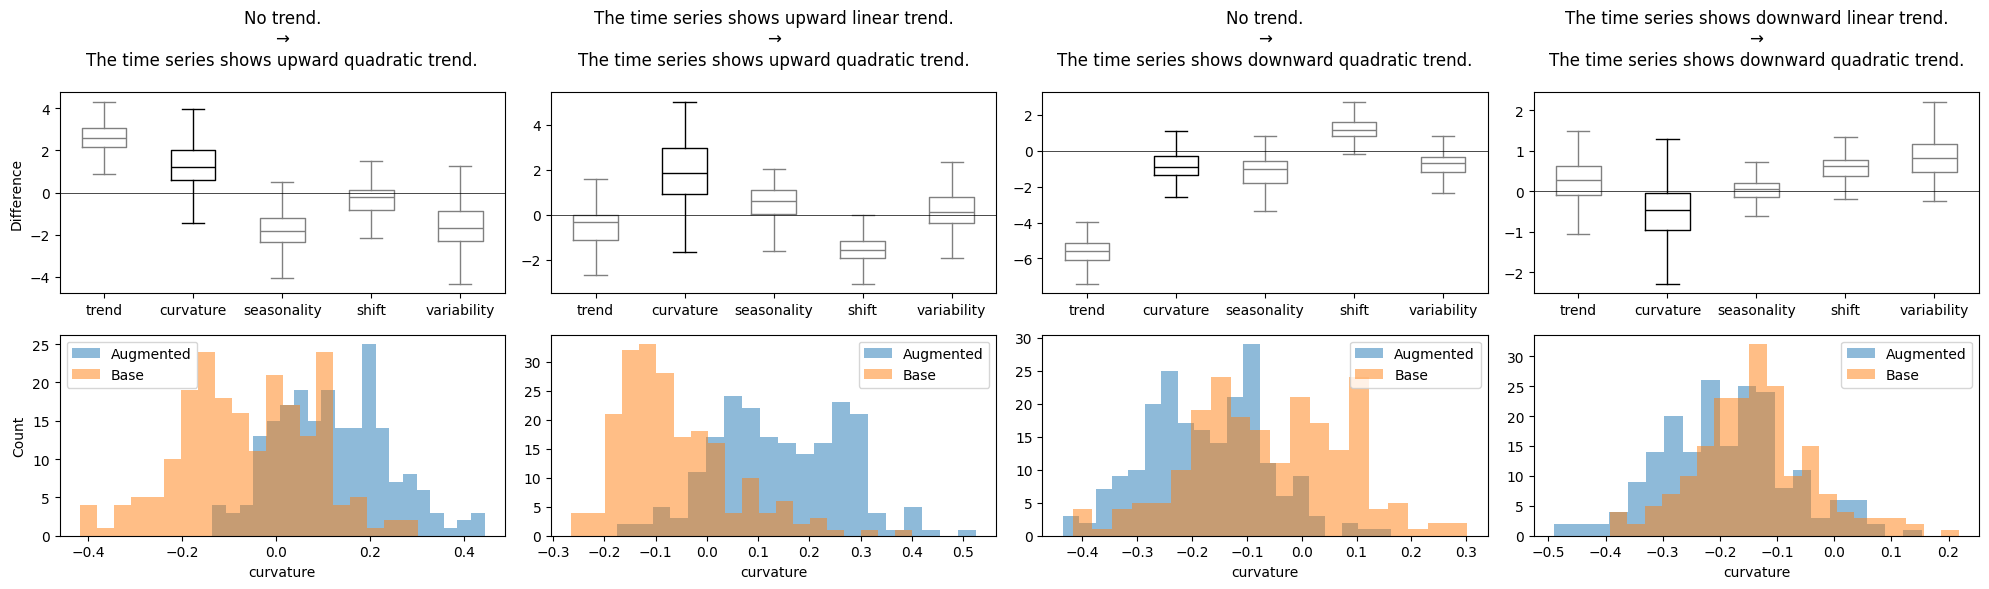

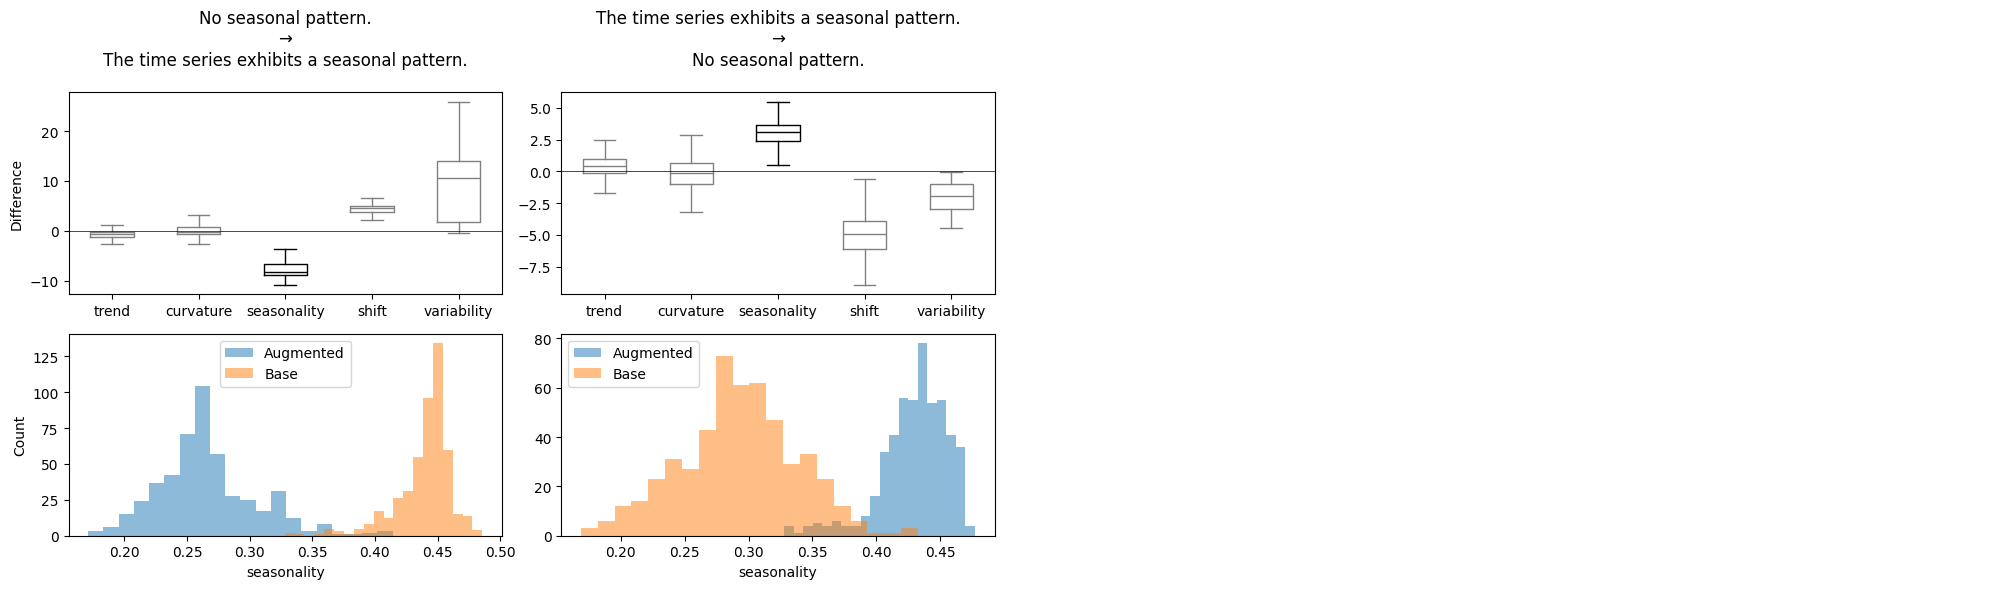

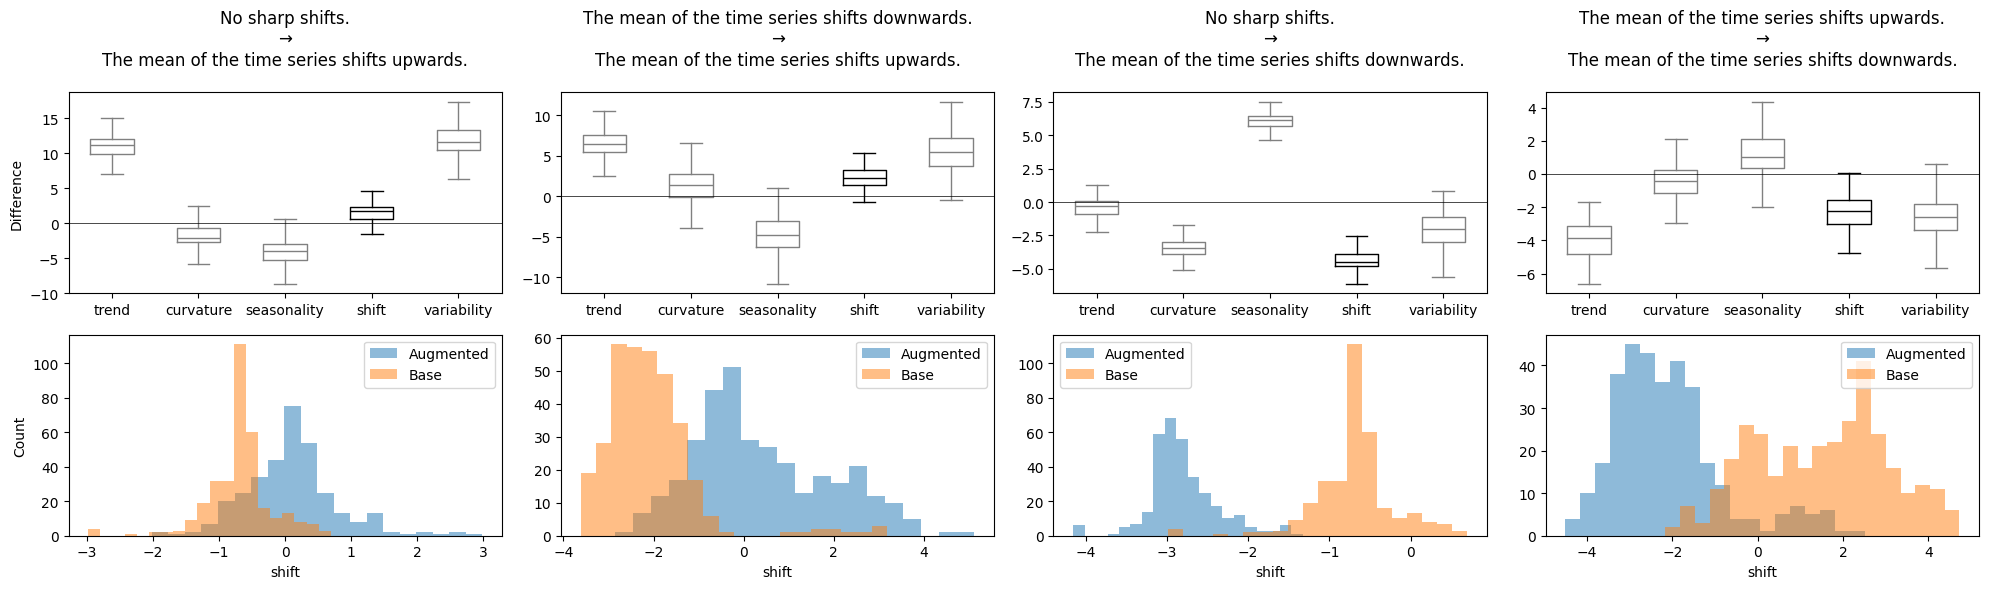

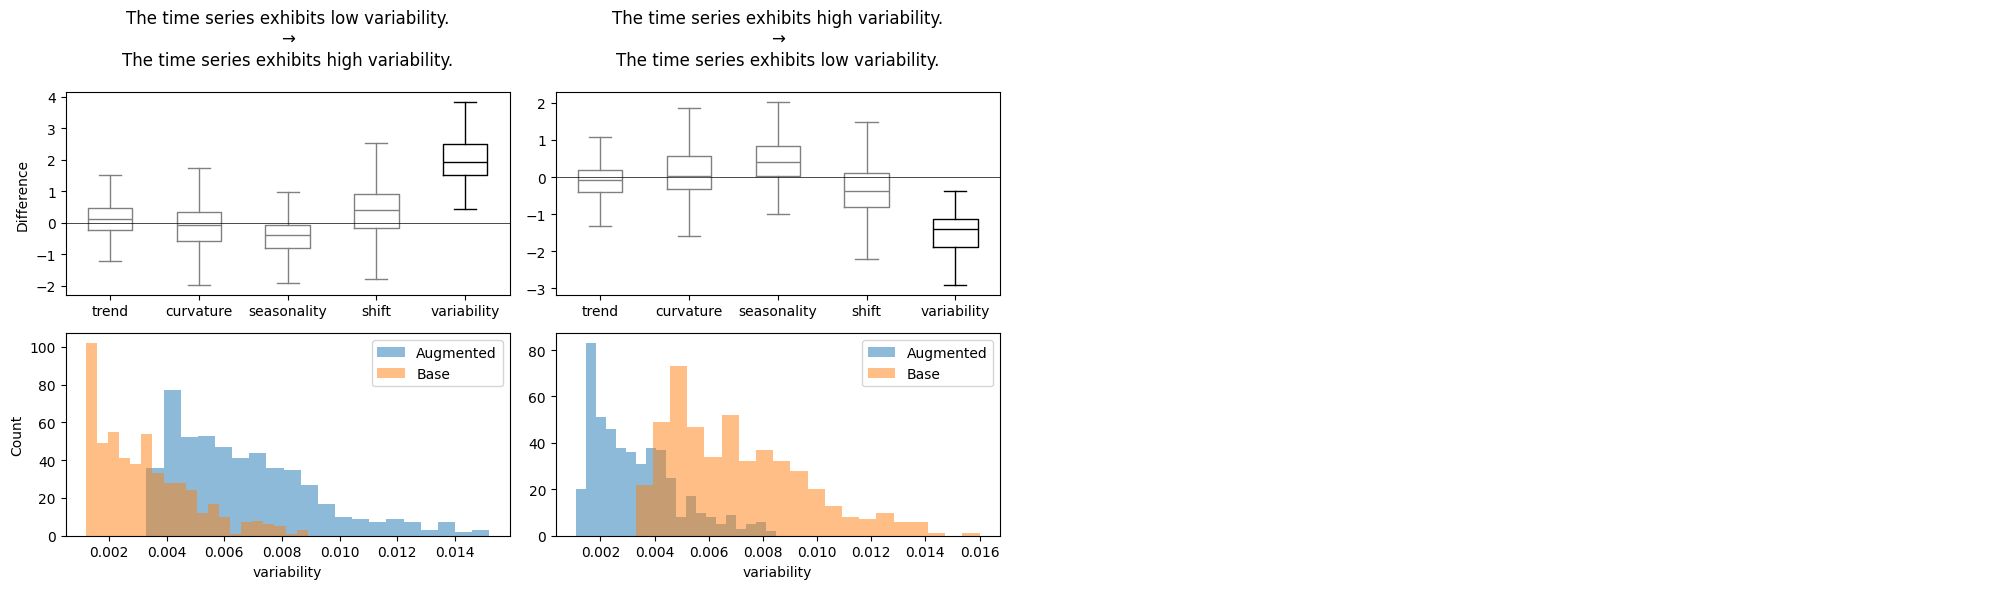

In [54]:
df_stats_condi = eng_math_diff_multiple(df_stats_all, base_aug_dict, metrics=math_metrics, aug_type='conditional')# 
df_stats_margi = eng_math_diff_multiple(df_stats_all, base_aug_dict, metrics=math_metrics, aug_type='marginal')# 
df_stats_condi['aug_type'] = 'conditional'
df_stats_margi['aug_type'] = 'marginal'
df_stats = pd.concat([df_stats_condi, df_stats_margi], ignore_index=True)


## TS distance (to both quantitative and qualitative)

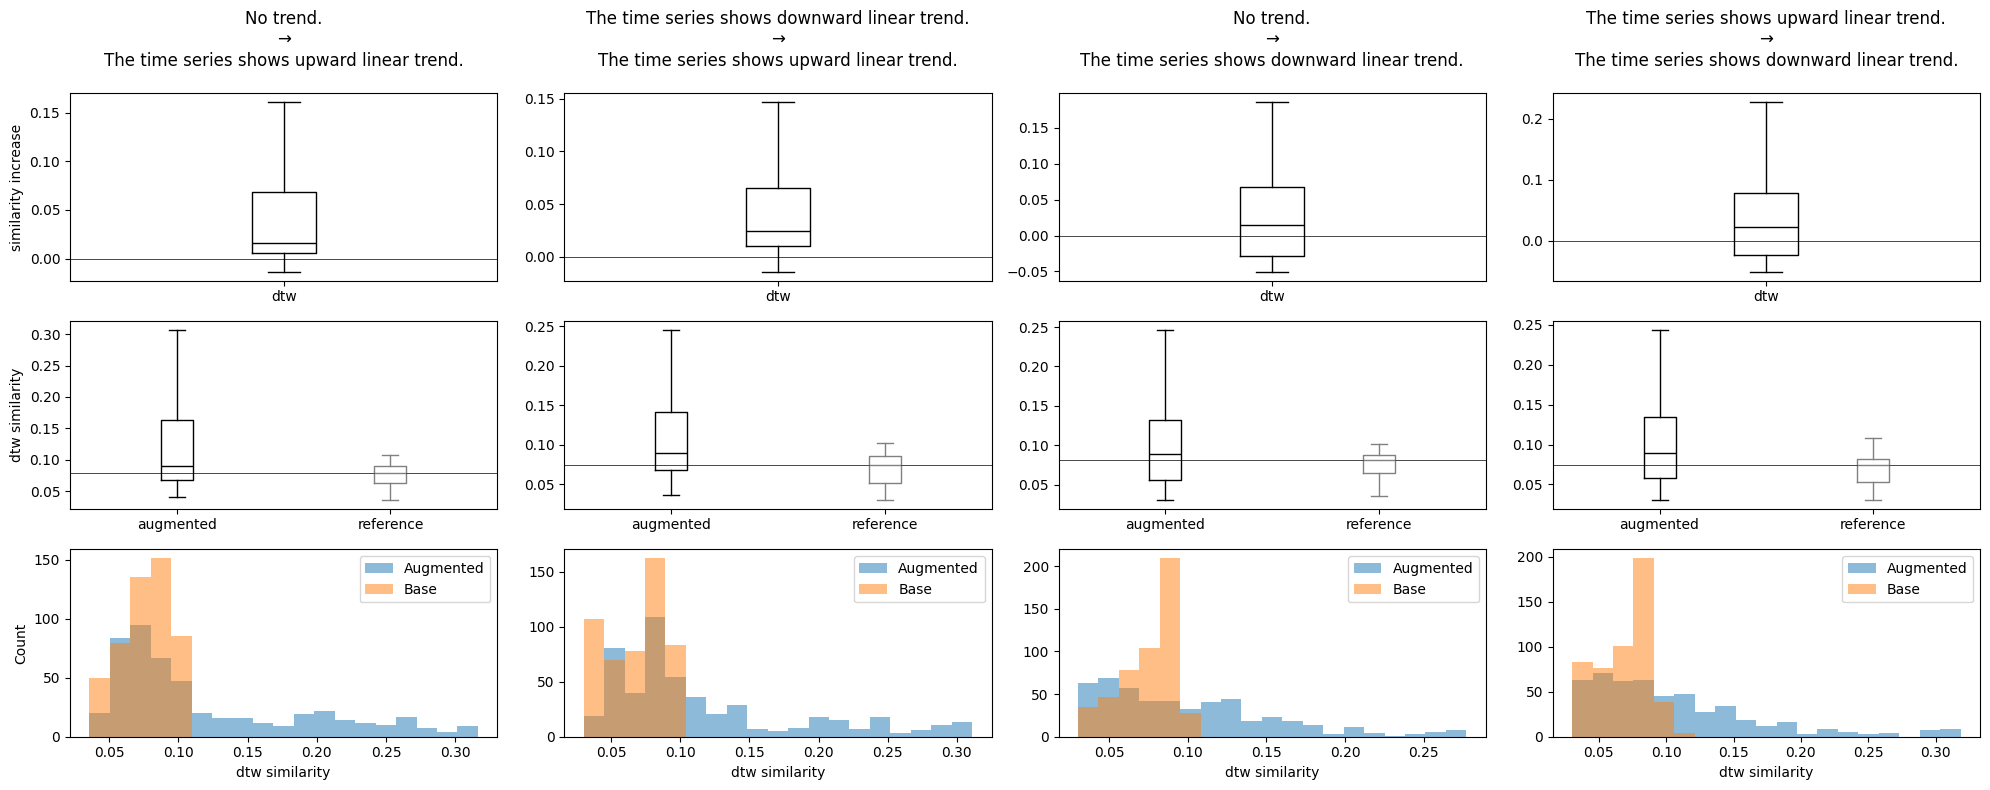

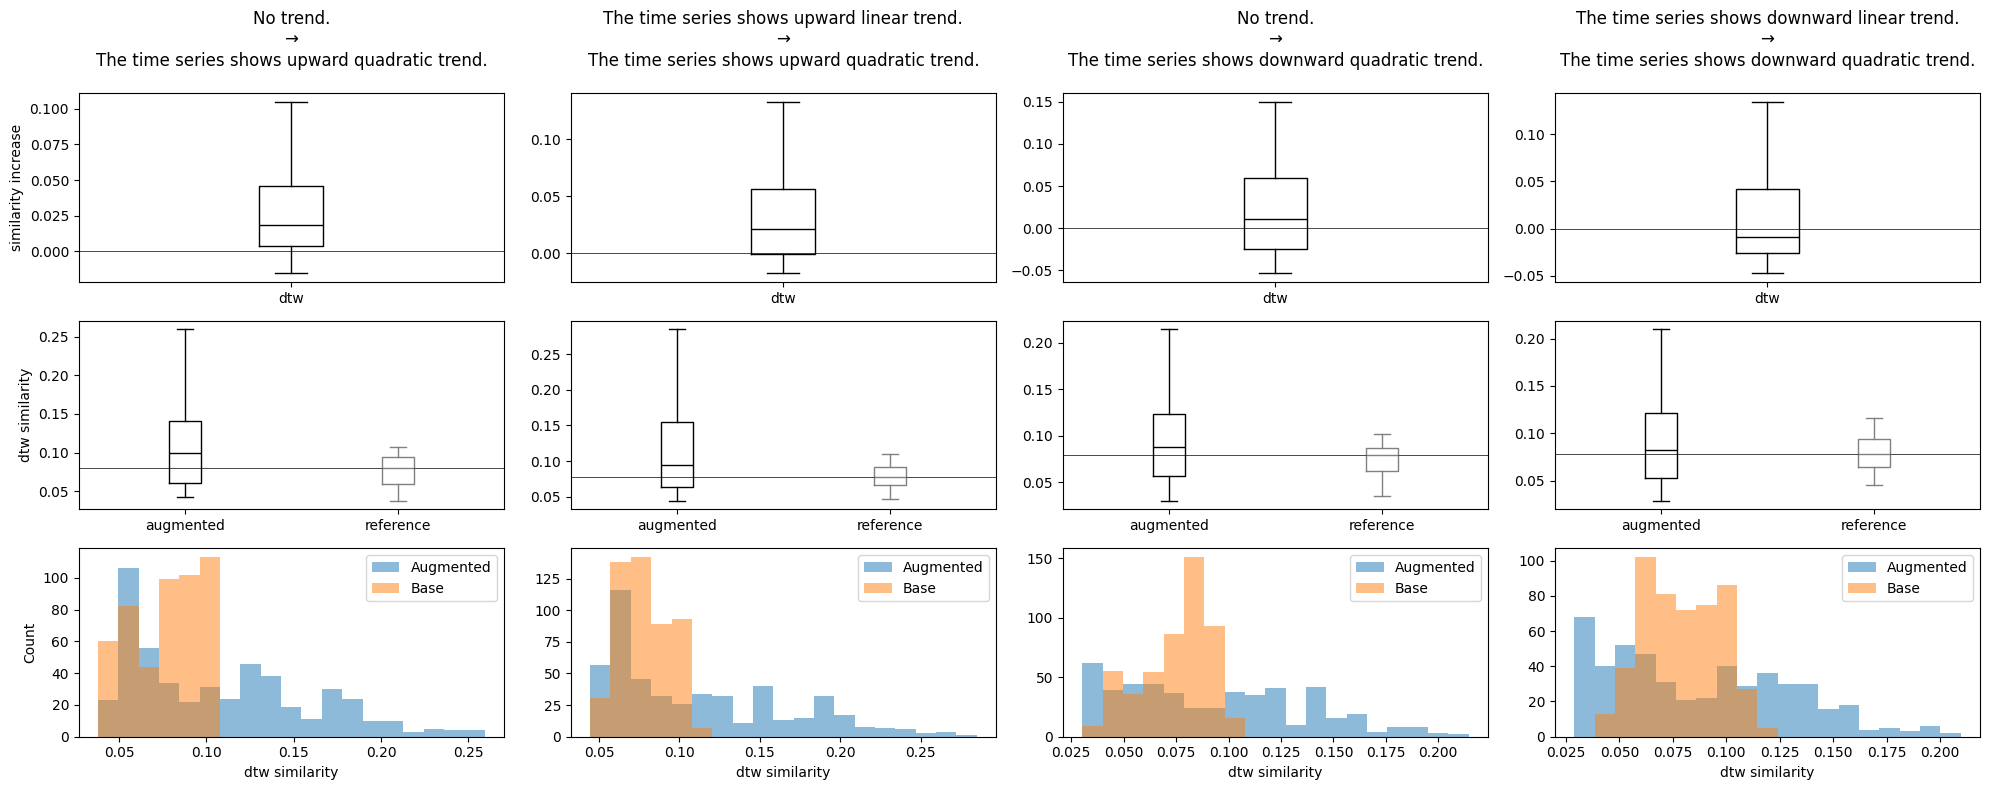

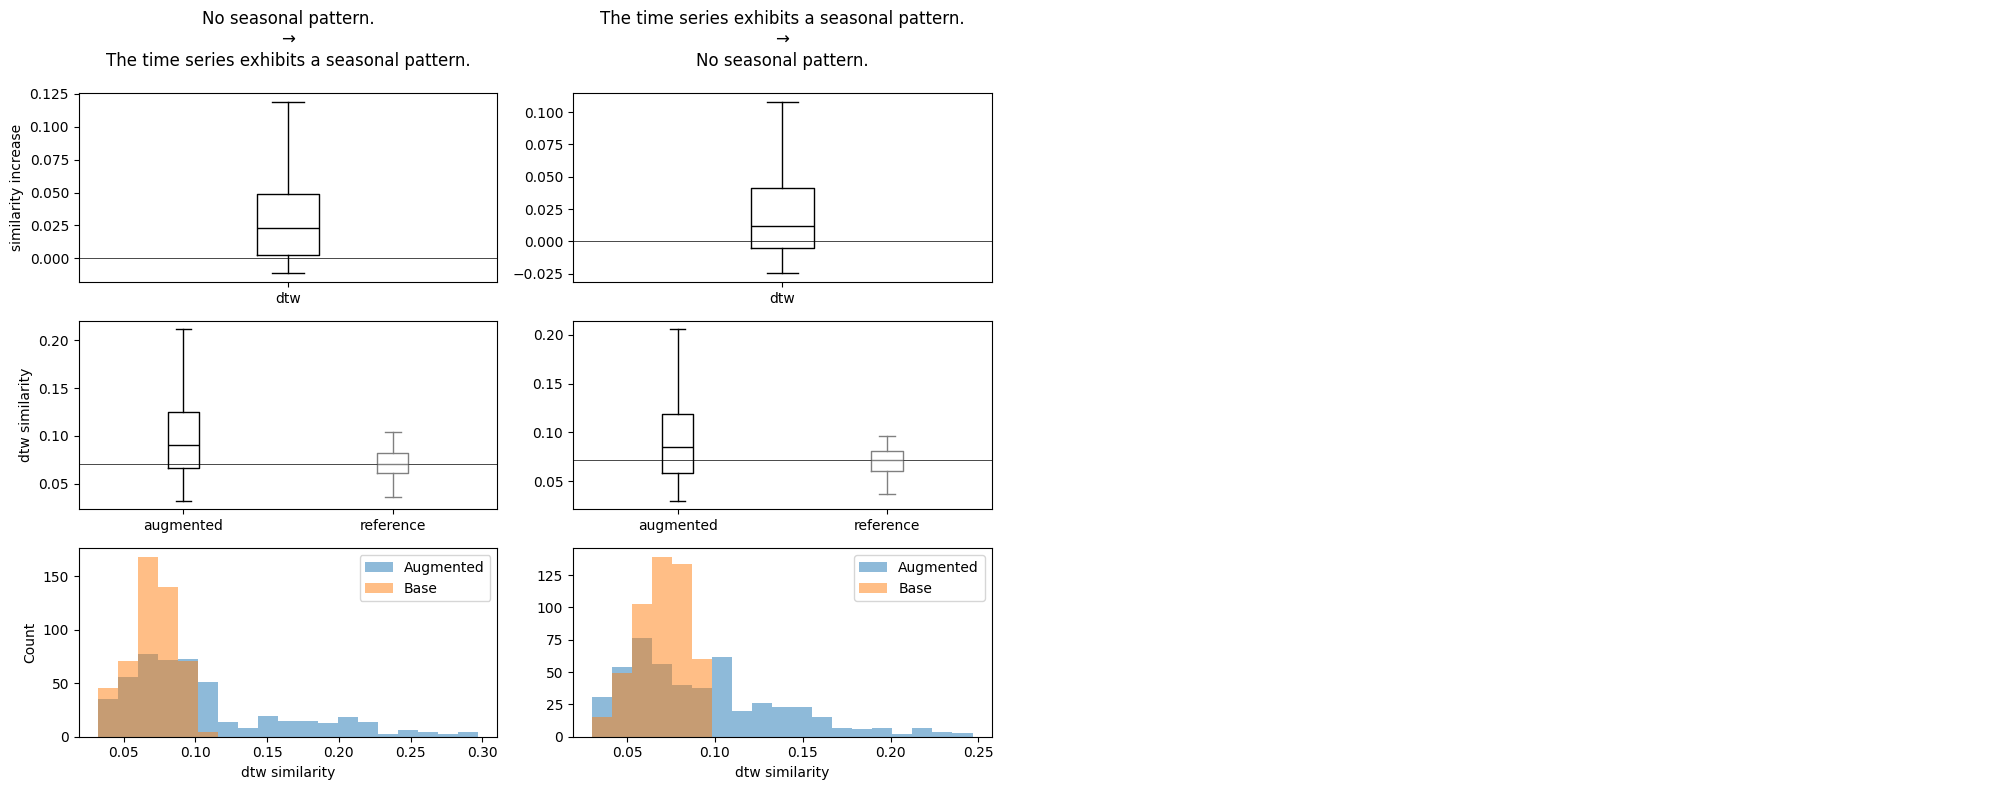

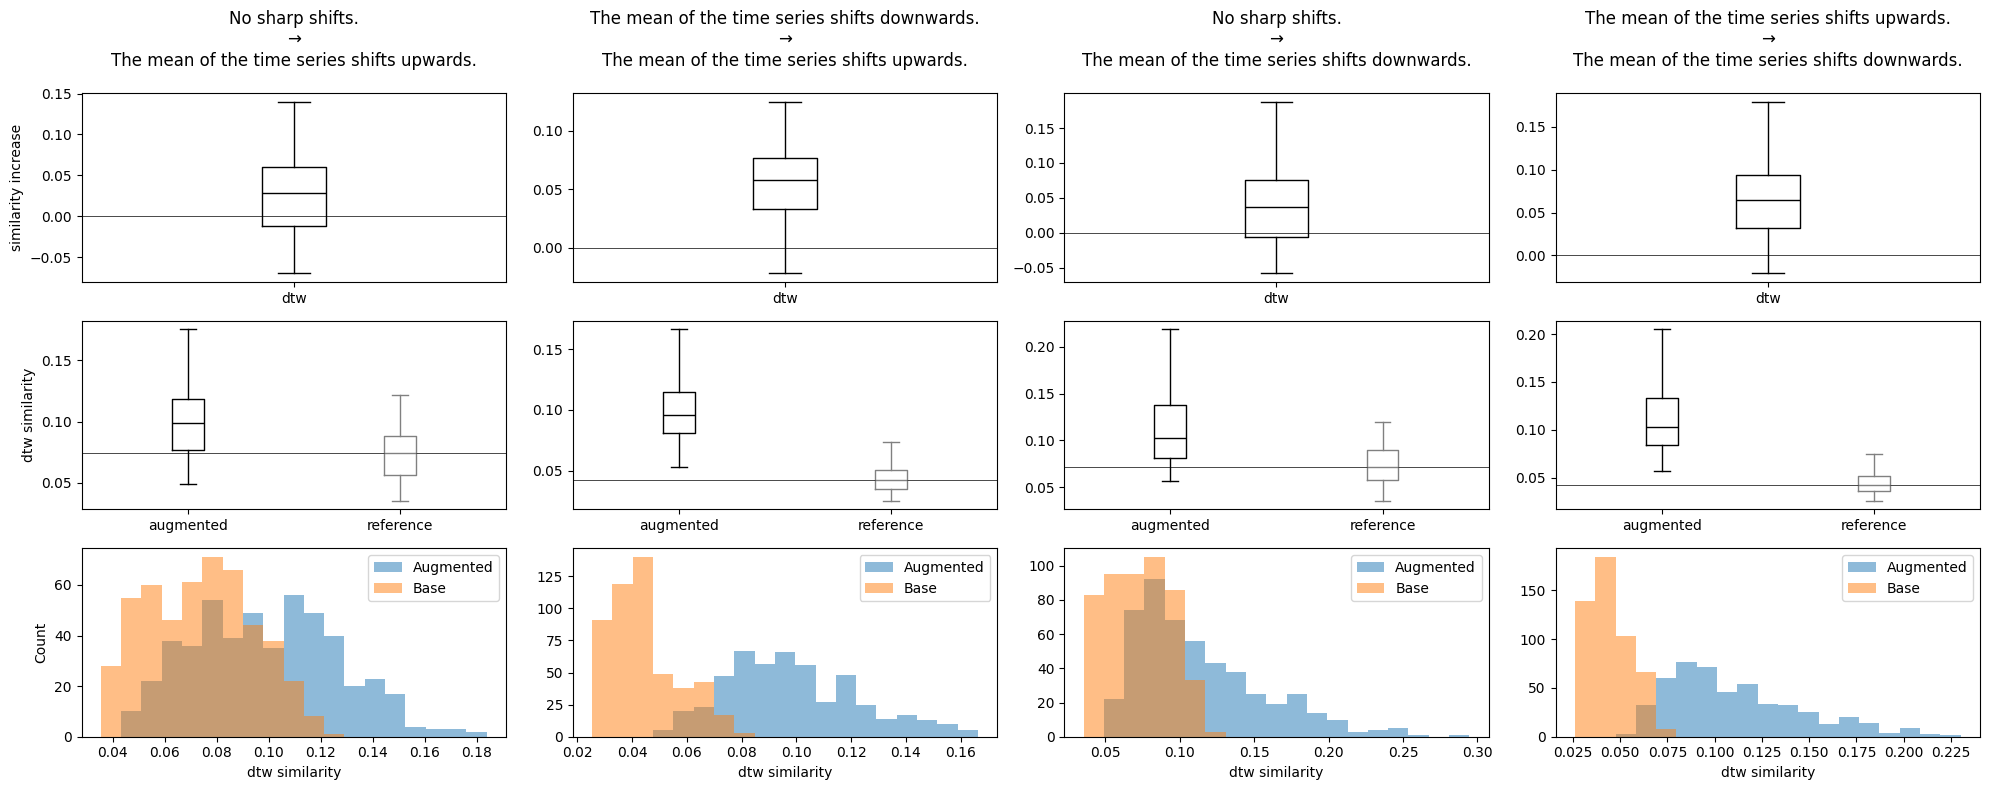

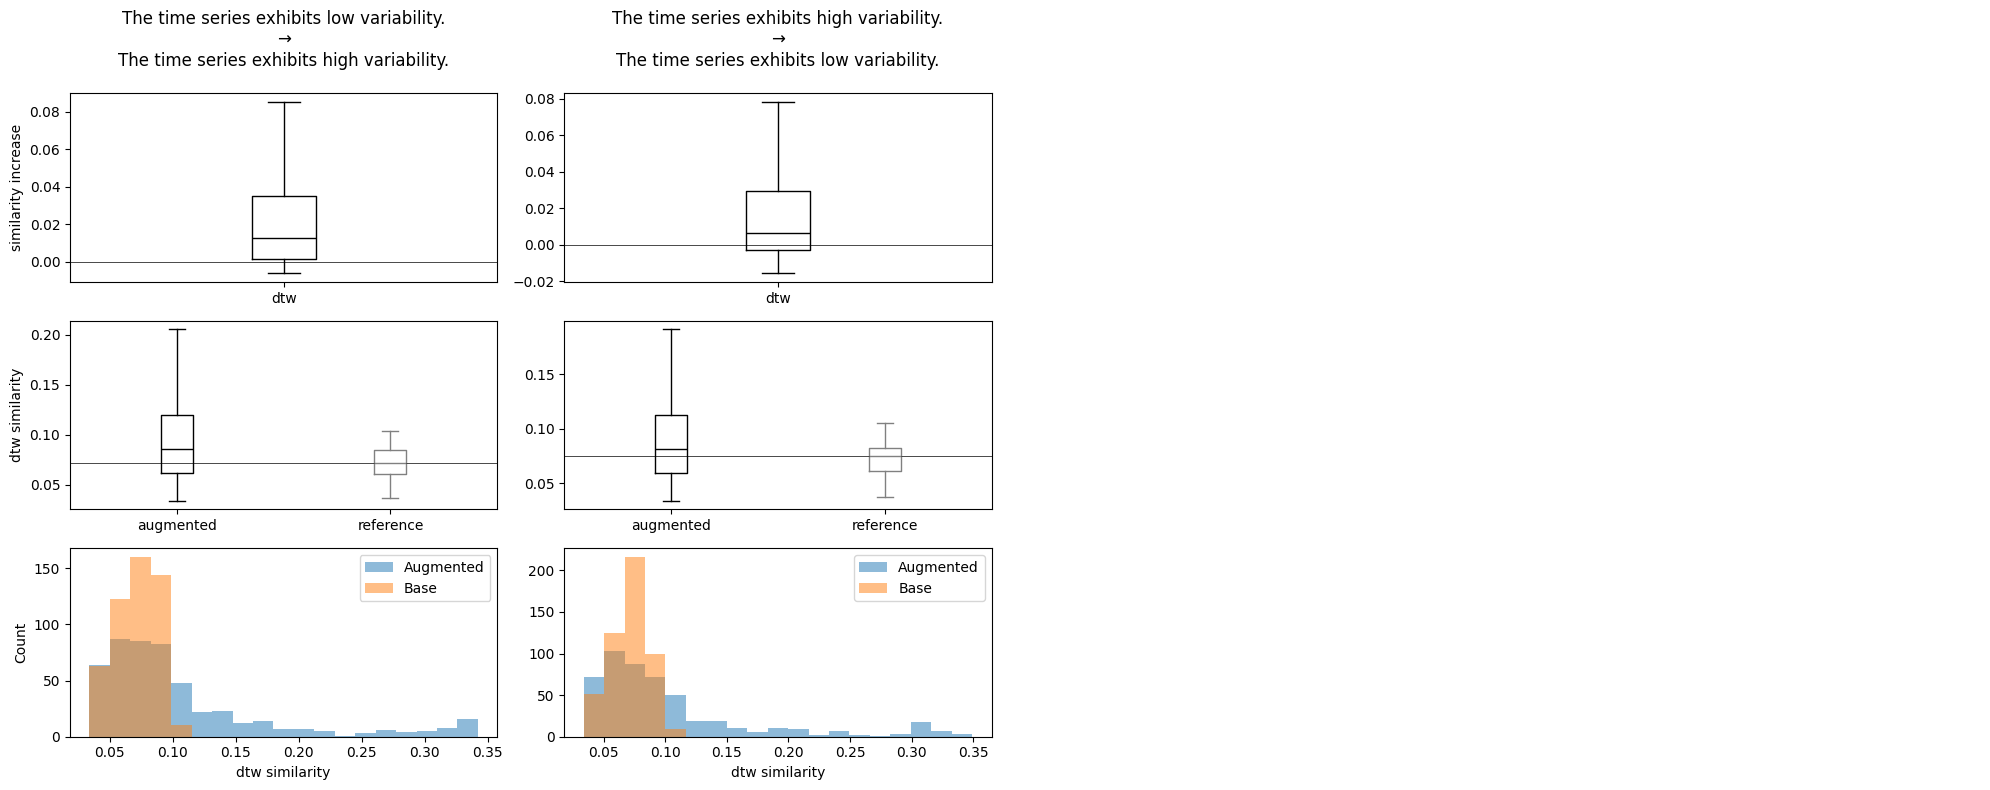

--------------------------------------------------------------------------------


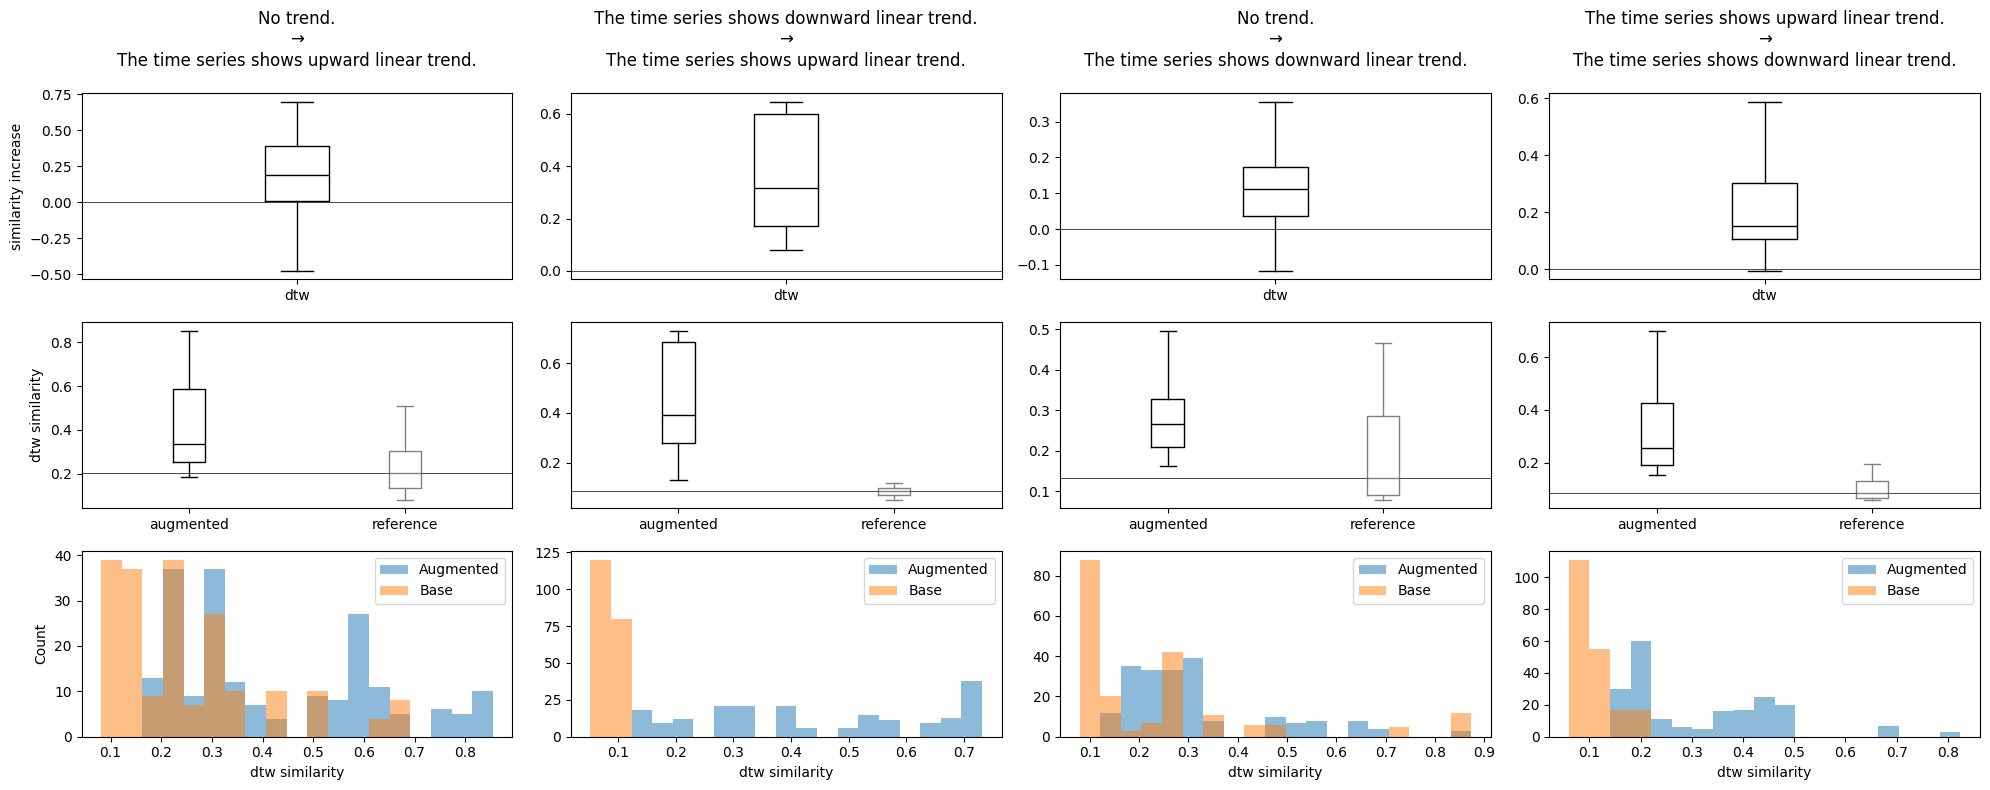

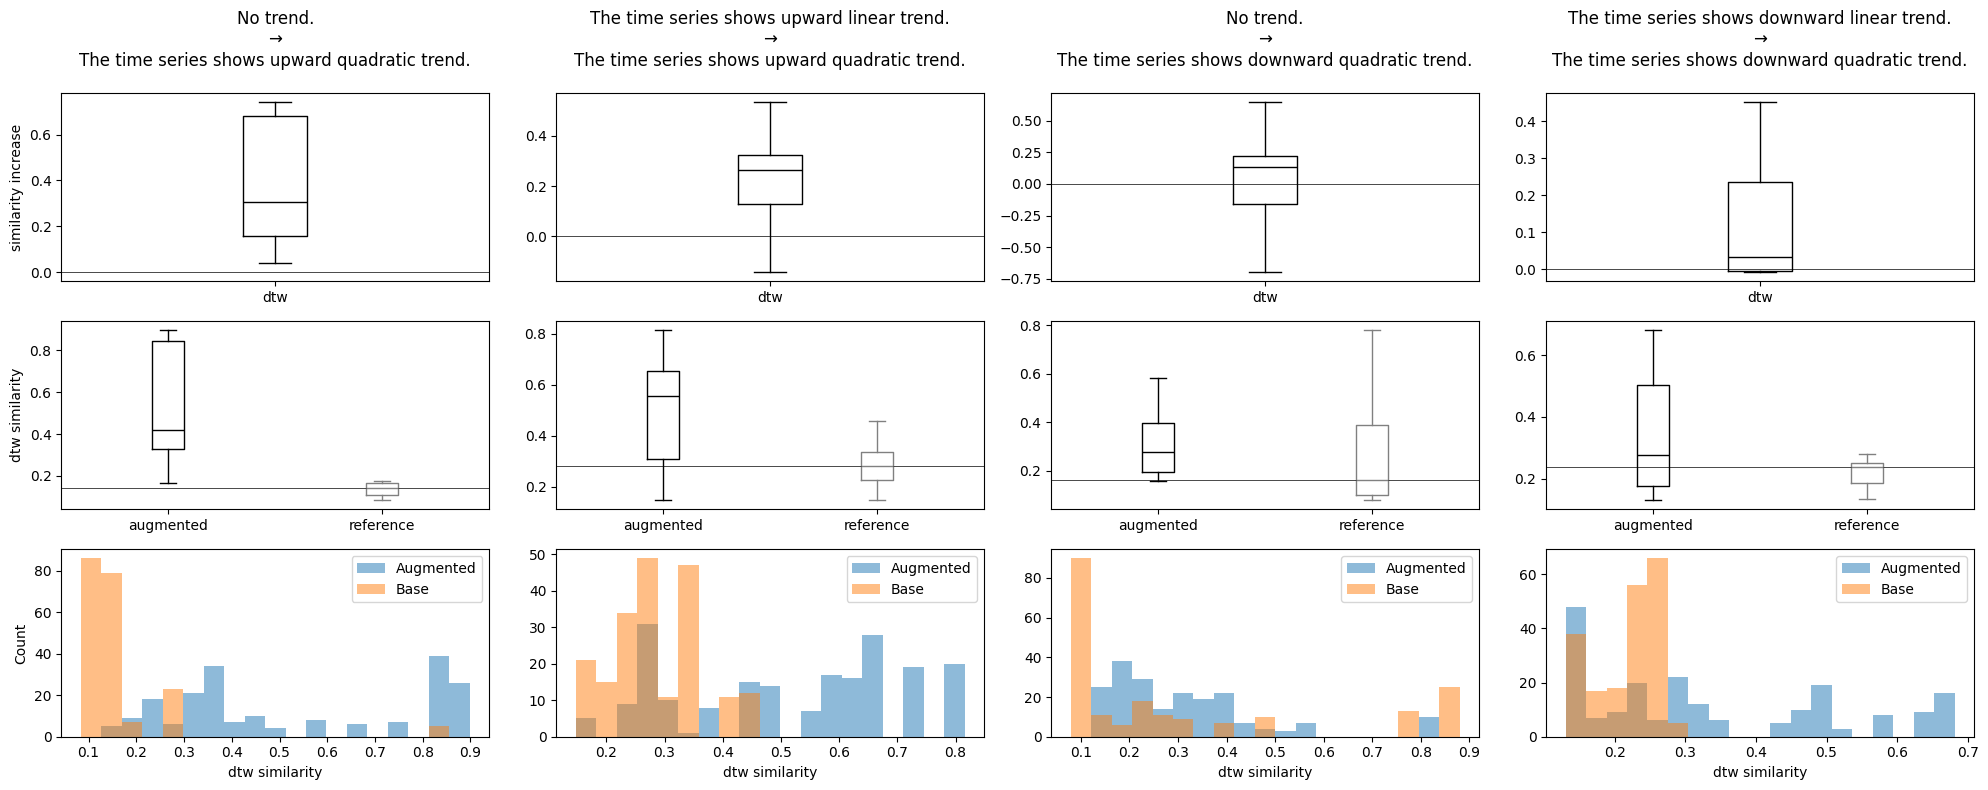

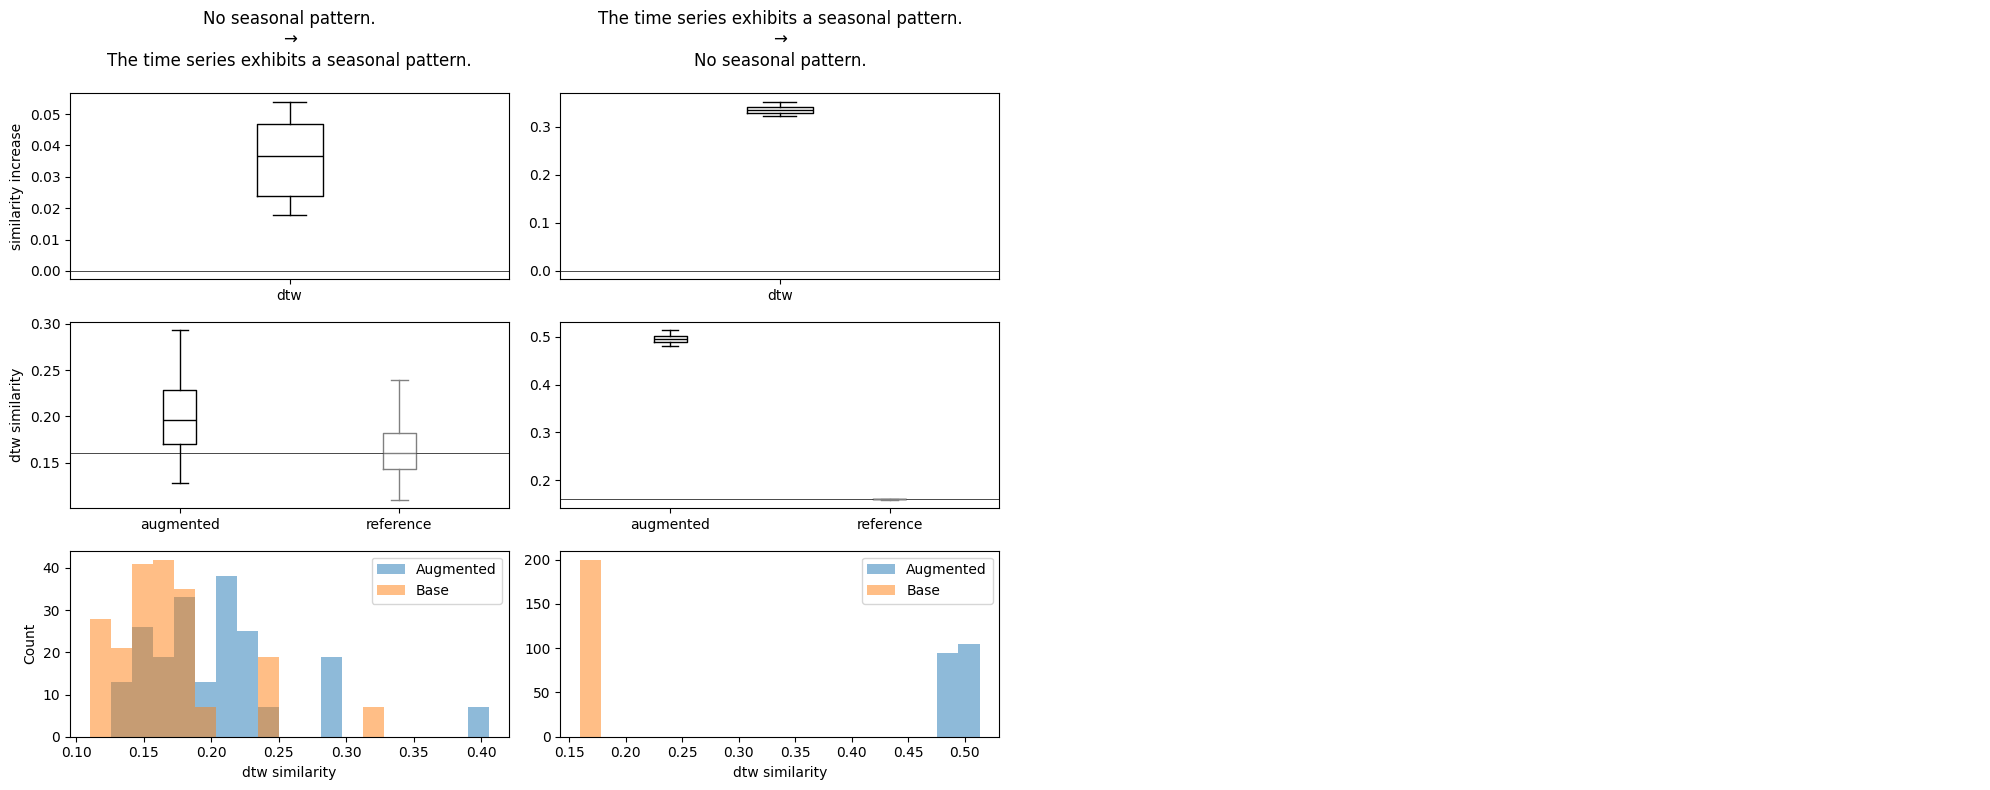

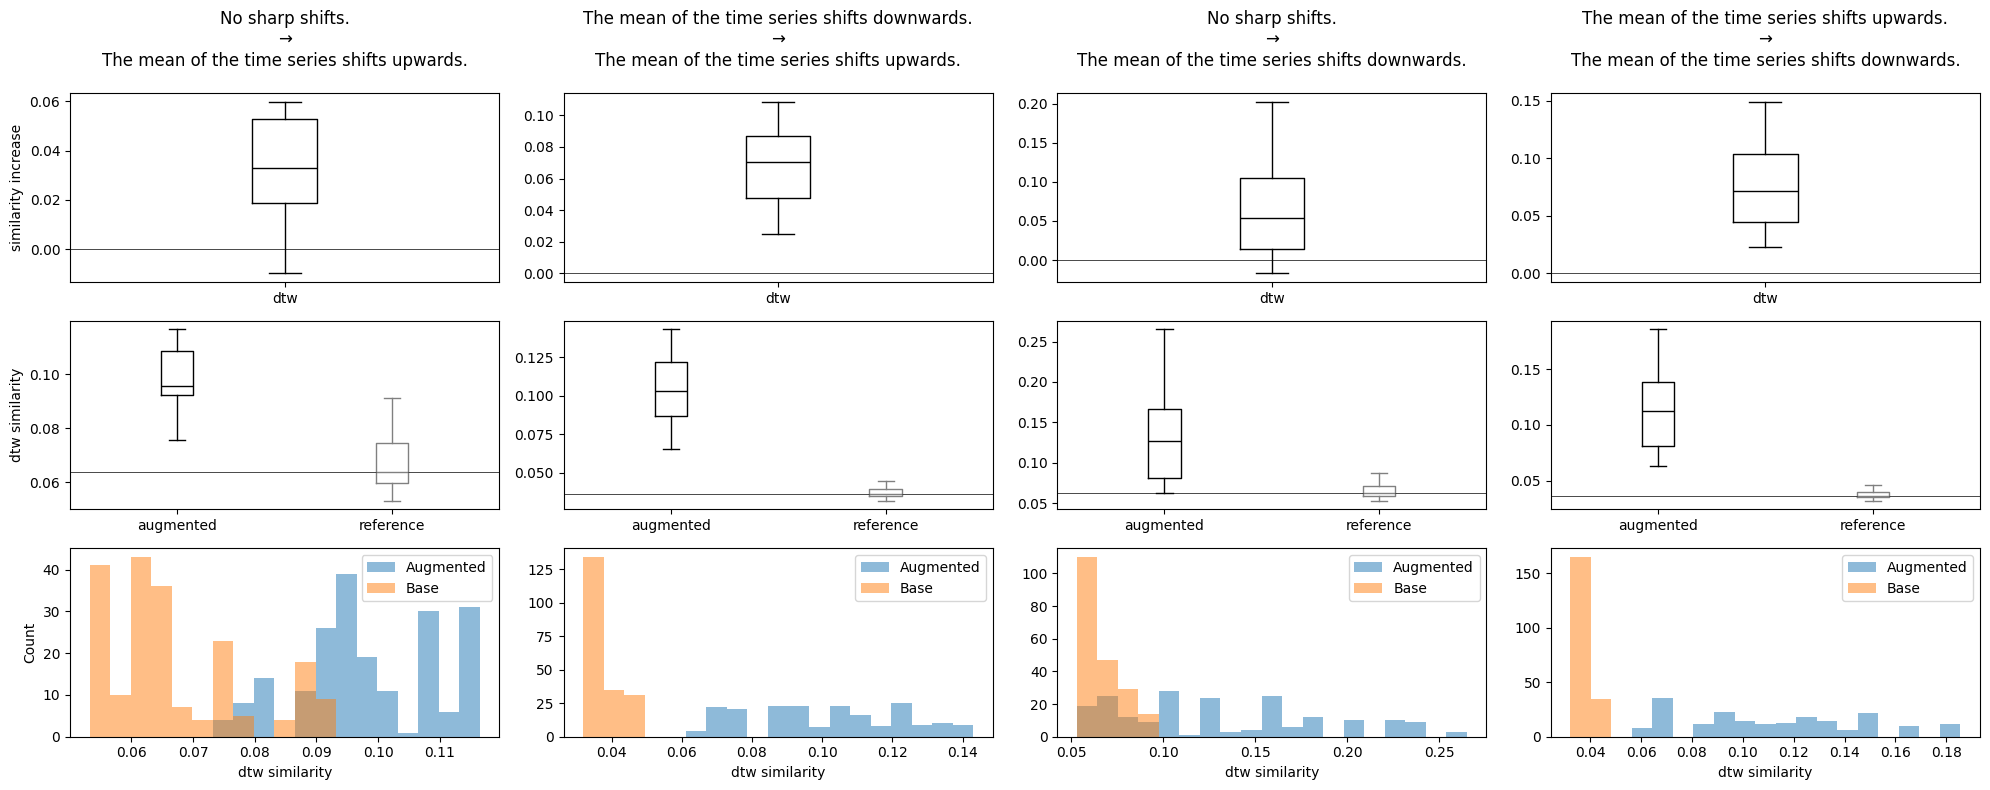

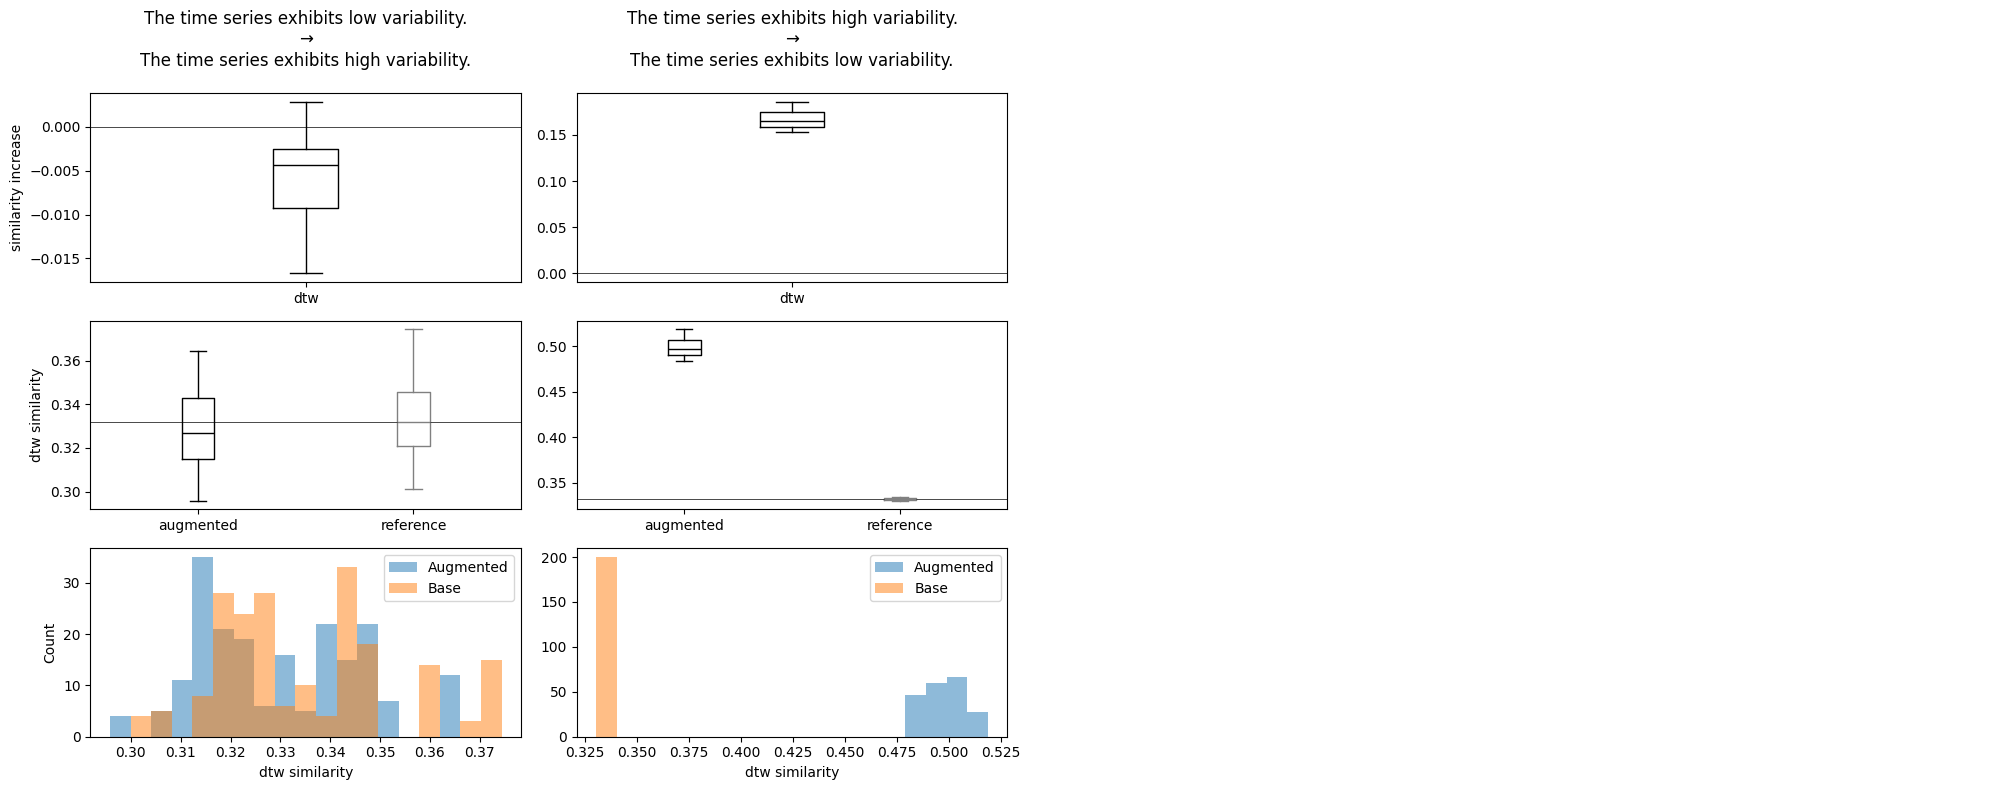

--------------------------------------------------------------------------------


In [112]:
# Define the base augmentation pairs
df_dists_raw = df_dists_ls[0]
df_dists = pd.DataFrame()
for metric in ['dtw']: # 'mse', 'mae', , 'lcss'
    df = eng_dists_multiple(df_dists_raw, base_aug_dict, metric = metric, aug_type='marginal')
    df_dists = pd.concat([df_dists, df], ignore_index=True)
df_dists_margi = df_dists
print('-'*80)

# Define the base augmentation pairs
df_dists_raw = df_dists_ls[1]
df_dists = pd.DataFrame()
for metric in ['dtw']: # 'mse', 'mae',, 'lcss' 
    df = eng_dists_multiple(df_dists_raw, base_aug_dict, metric = metric, aug_type='conditional')
    df_dists = pd.concat([df_dists, df], ignore_index=True)
df_dists_condi = df_dists
print('-'*80)

df_dists_all = pd.concat([df_dists_margi, df_dists_condi], ignore_index=True)

## RaTS

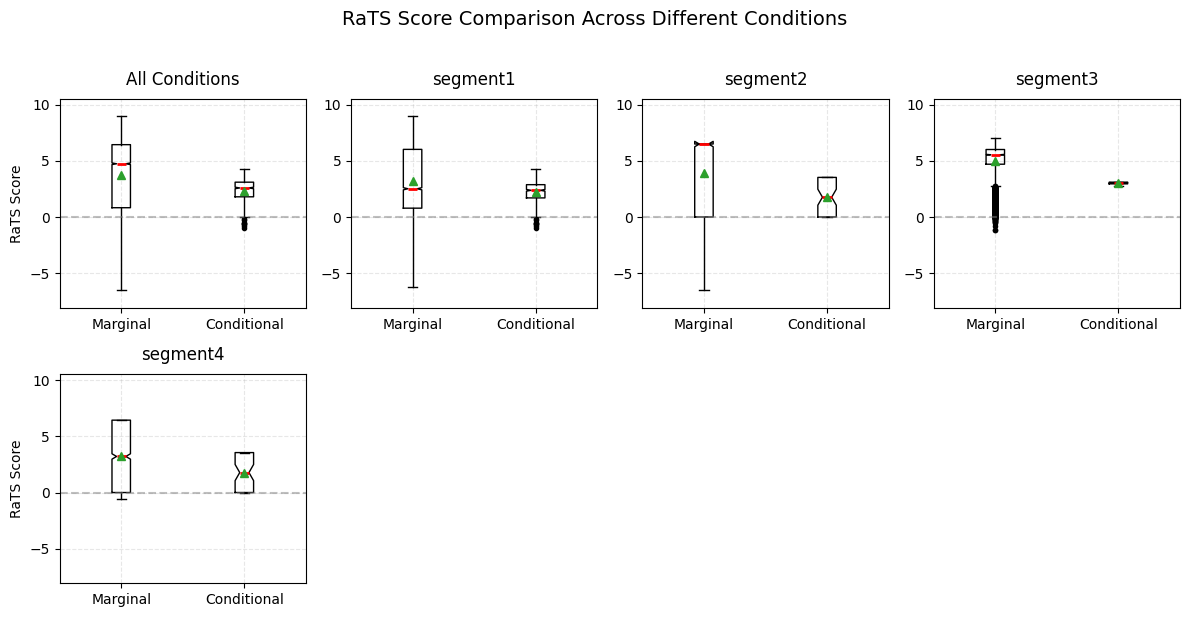

In [93]:
df_rats_margi = df_rats_ls[0]
df_rats_margi = df_rats_margi[df_rats_margi['aug_type'] == 'marginal']
df_rats_condi = df_rats_ls[1]
df_rats_condi = df_rats_condi[df_rats_condi['aug_type'] == 'conditional']
df_rats_all = pd.concat([df_rats_margi, df_rats_condi], ignore_index=True)

df_rats_all.dropna(inplace=True)
fig = plot_rats(df_rats_all, figsize=(12, 3))
plt.show()


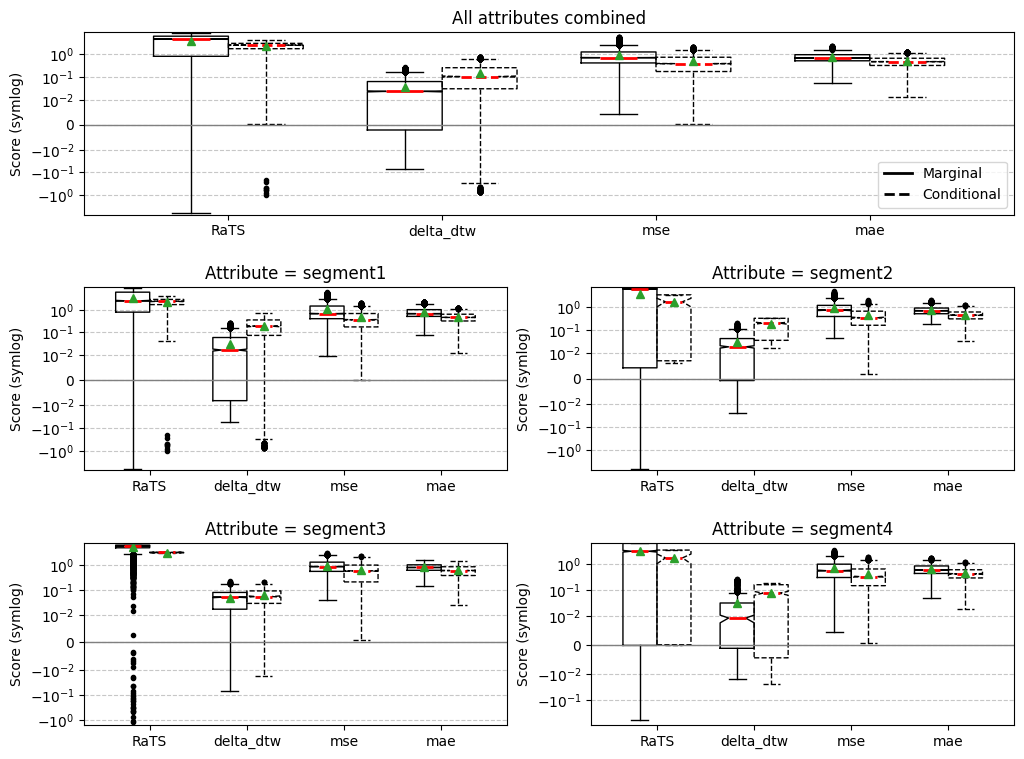

In [116]:
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

# 1) Combine & clean
df_all      = pd.concat([df_rats_all, df_dists_all, df_pw_dists_all],
                        ignore_index=True).dropna(subset=['score'])
attr_levels = df_all['attr'].unique().tolist()
metrics     = df_all['metric'].unique().tolist()

# 2) Shared box‐style kwargs
base_kwargs = dict(
    notch=True,
    showmeans=True,
    patch_artist=False,
    boxprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
    medianprops=dict(color="red", linewidth=2),
    flierprops=dict(markeredgecolor="black",
                    markerfacecolor="black",
                    marker="o",
                    markersize=3)
)

def draw_subplot(ax, subdf, title):
    width = 0.35
    x     = list(range(len(metrics)))

    # prepare data
    data_m = [subdf[(subdf.metric==m)&(subdf.aug_type=='marginal')]['score']
              for m in metrics]
    data_c = [subdf[(subdf.metric==m)&(subdf.aug_type=='conditional')]['score']
              for m in metrics]

    pos_m = [xi - width/2 for xi in x]
    pos_c = [xi + width/2 for xi in x]

    # marginal (solid)
    ax.boxplot(data_m, positions=pos_m, widths=width, **base_kwargs)

    # conditional (dashed)
    dashed = base_kwargs.copy()
    dashed.update({
        'boxprops':    dict(color="black", linestyle="--"),
        'medianprops': dict(color="red",   linestyle="--", linewidth=2),
        'whiskerprops':dict(color="black", linestyle="--"),
        'capprops':    dict(color="black", linestyle="--"),
    })
    ax.boxplot(data_c, positions=pos_c, widths=width, **dashed)

    # styling
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=0)
    ax.set_title(title)
    ax.set_ylabel("Score (symlog)")
    ax.set_yscale('symlog', linthresh=1e-2)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.axhline(0, color='gray', linestyle='-', linewidth=1)

# 3) Build a GridSpec with 2 columns
n_attrs  = len(attr_levels)
n_cols   = 2
n_rows   = 1 + math.ceil(n_attrs / n_cols)

fig = plt.figure(figsize=(12, 3*n_rows))
gs  = fig.add_gridspec(n_rows, n_cols, hspace=0.4)

# Top row: merged across both columns
ax0 = fig.add_subplot(gs[0, :])
draw_subplot(ax0, df_all, title="All attributes combined")

# Remaining rows: one attr per cell, left→right top→bottom
for idx, attr in enumerate(attr_levels):
    row = 1 + (idx // n_cols)
    col = idx % n_cols
    ax  = fig.add_subplot(gs[row, col])
    sub = df_all[df_all['attr']==attr]
    draw_subplot(ax, sub, title=f"Attribute = {attr}")

# 4) Legend on the top plot
legend_items = [
    Line2D([0],[0], color='black', lw=2, linestyle='-',  label='Marginal'),
    Line2D([0],[0], color='black', lw=2, linestyle='--', label='Conditional')
]
ax0.legend(handles=legend_items, loc='lower right')

plt.tight_layout()
plt.show()
